# Predicting House Price using Machine Learning 

In this notebook We will try and predict the price of a House using a data set from kaggle 

In the following notebooks, we will go through the implementation of each of the steps in the Machine Learning Pipeline 

We will discuss:

1. Data Analysis 
2. Feature Engineering 
3. Feature Selection 
4. Model Training 

## Features :

1. SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
2. MSSubClass: The building class
3.  MSZoning: The general zoning classification
4.  LotFrontage: Linear feet of street connected to property
5. LotArea: Lot size in square feet
6. Street: Type of road access
7.  Alley: Type of alley access
8.  LotShape: General shape of property
9.   LandContour: Flatness of the property
10.    Utilities: Type of utilities available
11.    LotConfig: Lot configuration
12.   LandSlope: Slope of property
13.    Neighborhood: Physical locations within Ames city limits
14.    Condition1: Proximity to main road or railroad
15.    Condition2: Proximity to main road or railroad (if a second is present)
16.    BldgType: Type of dwelling
17.    HouseStyle: Style of dwelling
18.    OverallQual: Overall material and finish quality
19.    OverallCond: Overall condition rating
20.    YearBuilt: Original construction date
21.    YearRemodAdd: Remodel date
22.    RoofStyle: Type of roof
23.    RoofMatl: Roof material
24.    Exterior1st: Exterior covering on house
25.    Exterior2nd: Exterior covering on house (if more than one material)
26.    MasVnrType: Masonry veneer type
27.    MasVnrArea: Masonry veneer area in square feet
28.    ExterQual: Exterior material quality
29. ExterCond: Present condition of the material on the exterior
30.    Foundation: Type of foundation
31.   BsmtQual: Height of the basement
32.   BsmtCond: General condition of the basement
33.    BsmtExposure: Walkout or garden level basement walls
34.    BsmtFinType1: Quality of basement finished area
35.    BsmtFinSF1: Type 1 finished square feet
36.    BsmtFinType2: Quality of second finished area (if present)
37.    BsmtFinSF2: Type 2 finished square feet
38.    BsmtUnfSF: Unfinished square feet of basement area
39.    TotalBsmtSF: Total square feet of basement area
40.    Heating: Type of heating
41.    HeatingQC: Heating quality and condition
42.    CentralAir: Central air conditioning
43.    Electrical: Electrical system
44.    1stFlrSF: First Floor square feet
45.    2ndFlrSF: Second floor square feet
46.    LowQualFinSF: Low quality finished square feet (all floors)
47.    GrLivArea: Above grade (ground) living area square feet
48.    BsmtFullBath: Basement full bathrooms
49.    BsmtHalfBath: Basement half bathrooms
50.    FullBath: Full bathrooms above grade
51.    HalfBath: Half baths above grade
52.    Bedroom: Number of bedrooms above basement level
53.    Kitchen: Number of kitchens
54.    KitchenQual: Kitchen quality
55.    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
56.    Functional: Home functionality rating
57.    Fireplaces: Number of fireplaces
58.    FireplaceQu: Fireplace quality
59.    GarageType: Garage location
60.    GarageYrBlt: Year garage was built
61.    GarageFinish: Interior finish of the garage
62.    GarageCars: Size of garage in car capacity
63.    GarageArea: Size of garage in square feet
64.    GarageQual: Garage quality
65.    GarageCond: Garage condition
66.    PavedDrive: Paved driveway
67.    WoodDeckSF: Wood deck area in square feet
68.    OpenPorchSF: Open porch area in square feet
69.    EnclosedPorch: Enclosed porch area in square feet
70.    3SsnPorch: Three season porch area in square feet
71.    ScreenPorch: Screen porch area in square feet
72.    PoolArea: Pool area in square feet
73.    PoolQC: Pool quality
74.    Fence: Fence quality
75.    MiscFeature: Miscellaneous feature not covered in other categories
76.    MiscVal: $Value of miscellaneous feature
77.    MoSold: Month Sold
78.    YrSold: Year Sold
79.    SaleType: Type of sale
80.    SaleCondition: Condition of sale


## Preparing the tools

In [54]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# for the yeo-johnson transformation 
import scipy.stats as stats 
import joblib

# to build models 
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel



# to display all the columns of the dataframe in the notebook 
pd.pandas.set_option('display.max_columns',None)

In [52]:
from feature_engine.encoding import OrdinalEncoder, RareLabelEncoder
from sklearn.preprocessing import Binarizer, MinMaxScaler


In [118]:
# import classes for imputation 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
# import classes for modelling 
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# Model Evaluations
from sklearn.metrics import mean_absolute_error,mean_squared_error,confusion_matrix,r2_score



## Load Data 

In [61]:
df = pd.read_csv('train.csv')


In [5]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

## 2.1 Explotalory Data Analysis 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [8]:
# drop id, it is just a number given to identify each house 
df.drop('Id',axis=1,inplace=True)
df.shape

(1460, 80)

### 2.2 Target 

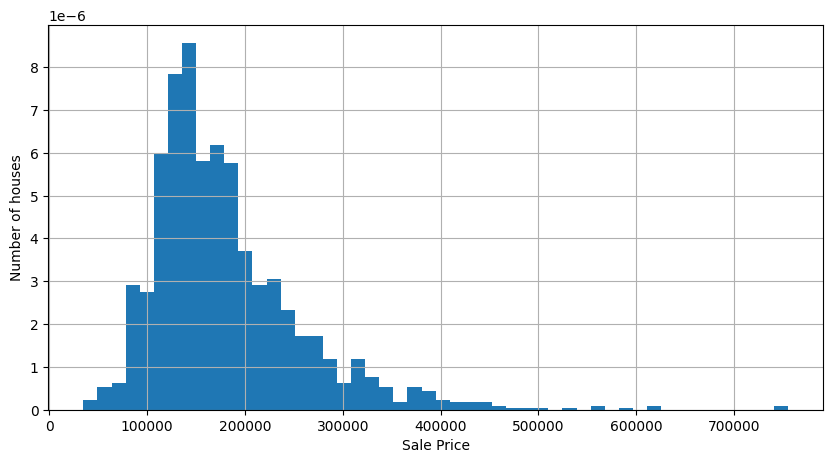

In [9]:
# histogram to evaluate target distribution 
plt.figure(figsize=(10,5))
df['SalePrice'].hist(bins=50,density=True)
plt.ylabel('Number of houses')
plt.xlabel('Sale Price');

We can see that the target is continuous, and the distribution towards the right. 

We can improve the value spread with a mathematical transformation.

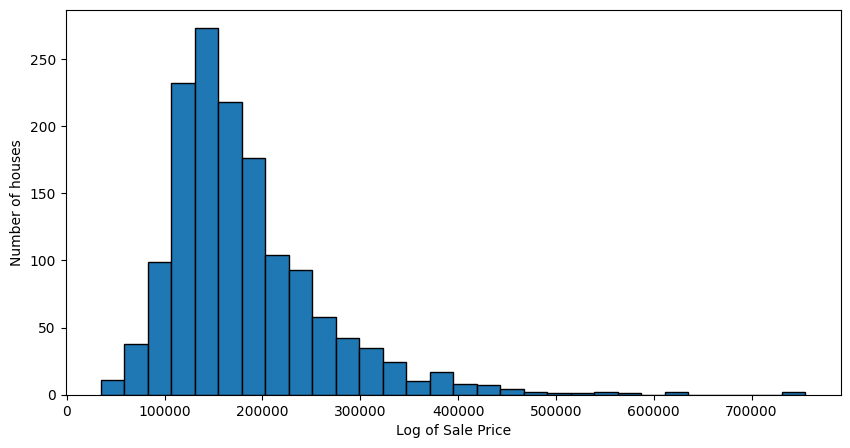

In [10]:
# let's transform the target using the logarithm 

plt.figure(figsize=(10,5))

df['SalePrice'].plot.hist(ec='black',bins=30)
plt.ylabel('Number of houses')
plt.xlabel('Log of Sale Price')
plt.show()

### 2.3 Variable Types 

Next, let's identify the categorical and numerical variables 


In [11]:
categorical_var = df.select_dtypes(include=object)
categorical_var.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
categorical_var = categorical_var.columns.to_list()

In [13]:
# MSSubClass is also categorical by definition, despite its numeric values 

categorical_var = categorical_var + ['MSSubClass']

In [14]:
len(categorical_var)

44

In [15]:
# cast all variables as categorical 
df[categorical_var] = df[categorical_var].astype('O')

In [16]:
# now let's identify the numerical variables 

num_vars = [var for var in df.columns if var not in categorical_var and var!='SalePrice']

# number of numerical variables 
len(num_vars)

35

## 3 Missing Values 
Let's go ahead and find out which variables of the dataset contain missing values. 

In [17]:
# make a list of the variables that contain missing values 
vars_with_na = [var for var in df.columns if df[var].isnull().sum()>0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missing data 

df[vars_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

Our dataset contains a few variables with a big proportion of missing values (4 variables at the top). And some other
variables with a small percentage of missing observations. 

This means that to train a machine learning model with this data set, we need to impute the missing data in these variables 

We can also visualize the percentage of missing values in the variables as follows:

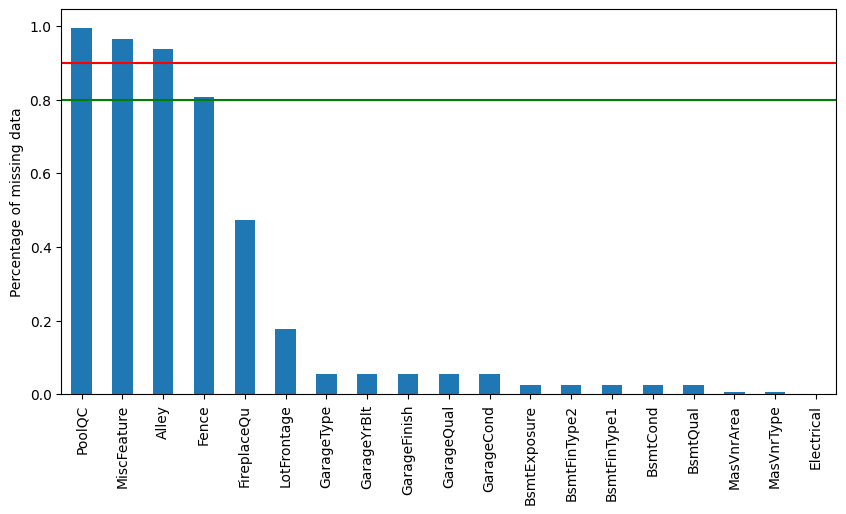

In [18]:
# plot 
plt.figure(figsize=(10,5))
df[vars_with_na].isnull().mean().sort_values(ascending=False).plot.bar()
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r',  linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

In [19]:
# now we can determine which variables, from those with missing data,
# are numerical and which are categorical 

cat_na = [var for var in categorical_var if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('Number of categorical variables with na:', len(cat_na))
print('Number of numerical variables with na:', len(num_na))

Number of categorical variables with na: 16
Number of numerical variables with na: 3


In [20]:
num_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [21]:
cat_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

## Numerical Variables 

Let's go ahead and find out what numerical variables we have in the dataset


In [22]:
print('Number of numerical variables:', len(num_vars))

# visualise the numerical variables 
df[num_vars].head()

Number of numerical variables: 35


LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1             3             1             8           0   
1         0             3             1             6           1   
2         1             3             1             6           1   
3         0             3             1             7           1   
4         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
0              0          0            0         0        0       2    2008  
1              0          0            0         0        0       5    2007  
2              0          0            0         0        0       9    2008  
3            272          0            0         0        0       2    2006  
4              0          0            0         0        0      12    2008

## 4.1 Temporal Variables 

We have 4 year variables in the dataset:

* YearBuilt: year in which the house was built 
* YearRemodAdd: year in which the house was remodeled 
* GarageYrBlt: year in which a garage was built 
* YrSold: year in which the house was sold 


We generally don't use date variables in their raw format. Instead, we extract information from them. for example we can 
capture the difference in years between the year the house was built and the year the house was sold. 

In [23]:
# list of variables that contain year information 

year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [24]:
# let's explore the values of these temporal variables 

for var in year_vars:
    print(var, df[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

We can explore the evolution of the sale price with the years in which the house was sold

Text(0, 0.5, 'Median House Price')

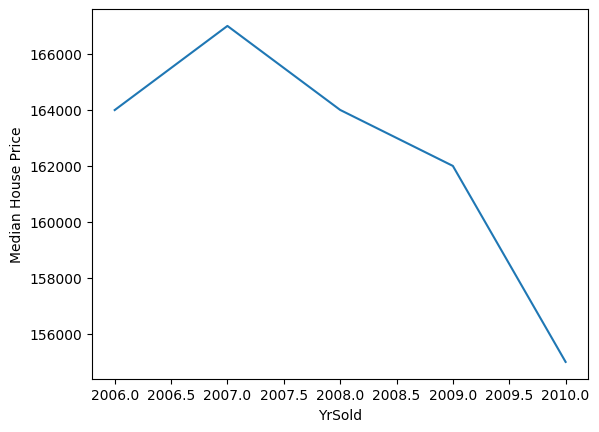

In [25]:
# plot median sale price vs year in which it was sold 

df.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

There has been a drop in the value of the houses. That is unusual, in real life, house prices typically go up as years go by. 

Let's explore a bit further.

Let's plot the price of sale vs year in which it was built 

Text(0, 0.5, 'Median House Price')

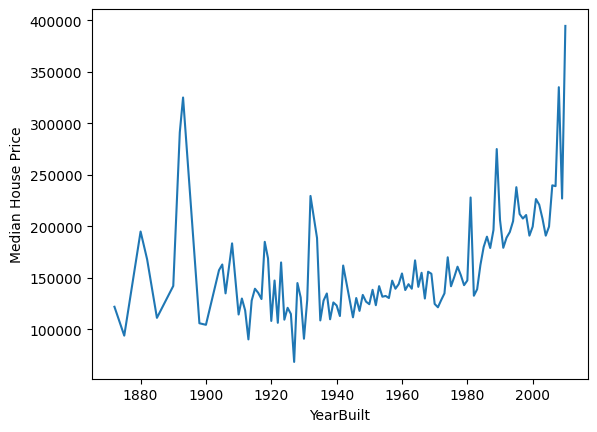

In [26]:
# plot median sale price vs year in which it was built 

df.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

We can see that newly built/younger houses tend to be more expensive.
Could it be that lately older houses were sold? Let's have a look at that. 

For this, we will capture the elapsed years between the year variables and the year in which the house was sold: 

In [27]:
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

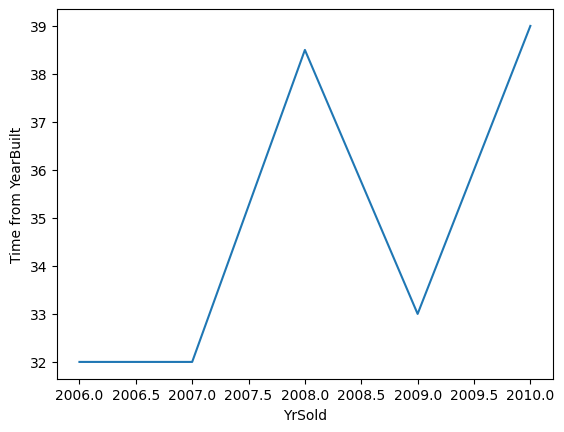

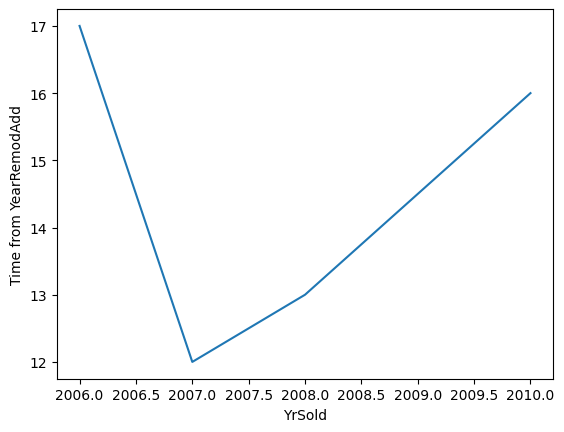

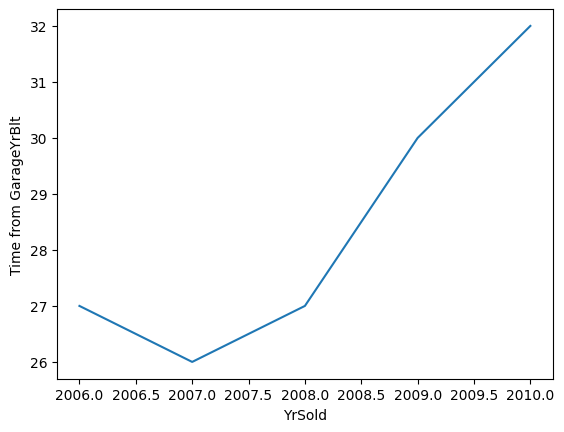

In [28]:
def analyse_year_vars(df,var):
    
    df = df.copy()
    
    # capture difference between a year variable and year
    # in which the house was sold 
    df[var] = df['YrSold']-df[var]
    
    df.groupby('YrSold')[var].median().plot()
    plt.ylabel('Time from '+ var)
    plt.show()
    
    
for var in year_vars:
    if var!='YrSold':
        analyse_year_vars(df,var)

From the plots, we see that towards 2010, the houses sold had older garages, and had not been remodelled recently, that might 
explain why we see cheaper sales prices in recent years, at least in this dataset.

We can now plot instead the time since last remodelled, or time since built, and sale price, to see if there is a relationship.

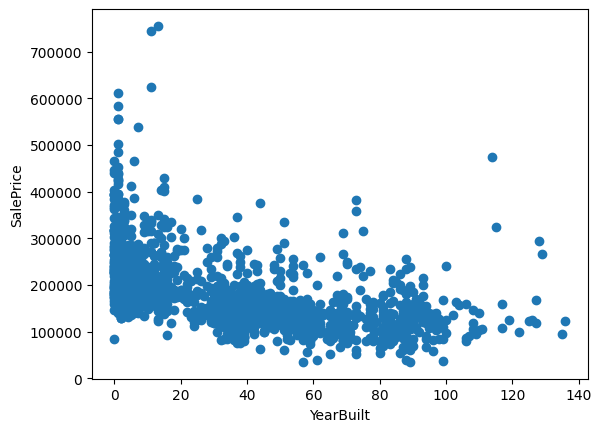

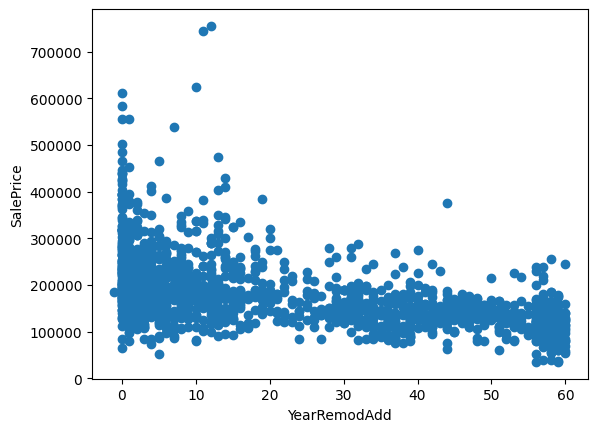

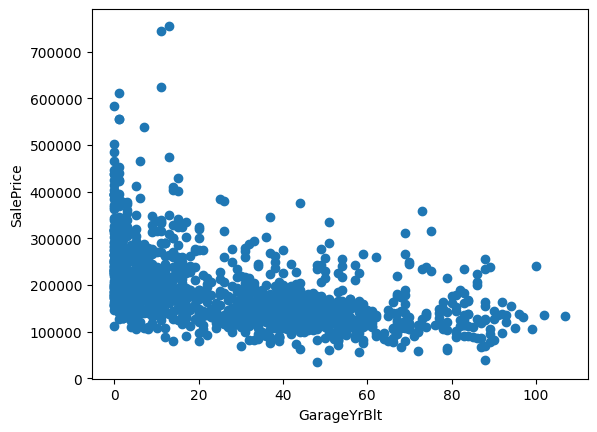

In [29]:
def analyse_year_vars(df,var):
    
    df = df.copy()
    
    # capture difference between a year variable and year 
    # in which the house was sold 
    df[var] = df['YrSold'] - df[var]
    
    plt.scatter(df[var],df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()
    
    
for var in year_vars:
    if var!='YrSold':
        analyse_year_vars(df,var)

We see that there is a tendency to a decrease in price, with older houses. In other words, the longer the time between the
house was built or remodeled and sale date, the lower the sale Price. 

Which makes sense, cause this means that the house will have an older look, and potentially needs repairs

# 4.2 Discrete variables 

Let's go ahead and find which variables are discrete,i.e., show a finite number of values

In [30]:
len(df['MSSubClass'].unique()<20)

15

In [31]:
# let's make a list of discrete variables
discrete_vars = [var for var in num_vars if len(df[var].unique())<20 and var not in year_vars]

print('Number of discrete variables:', len(discrete_vars))

Number of discrete variables: 13


In [32]:
# let's visualise the discrete variables 

df[discrete_vars].head()

OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0            7            5             1             0         2         1   
1            6            8             0             1         2         0   
2            7            5             1             0         2         1   
3            7            5             1             0         1         0   
4            8            5             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  PoolArea  \
0             3             1             8           0           2         0   
1             3             1             6           1           2         0   
2             3             1             6           1           2         0   
3             3             1             7           1           3         0   
4             4             1             9           1           3         0   

   MoSold  
0       2  
1       5  
2       9  
3       2  
4      12

In [33]:
df[df['BedroomAbvGr']==0]['BedroomAbvGr']

53      0
189     0
634     0
1163    0
1213    0
1270    0
Name: BedroomAbvGr, dtype: int64

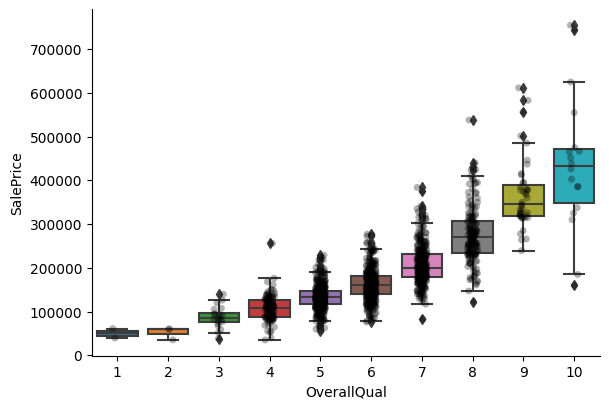

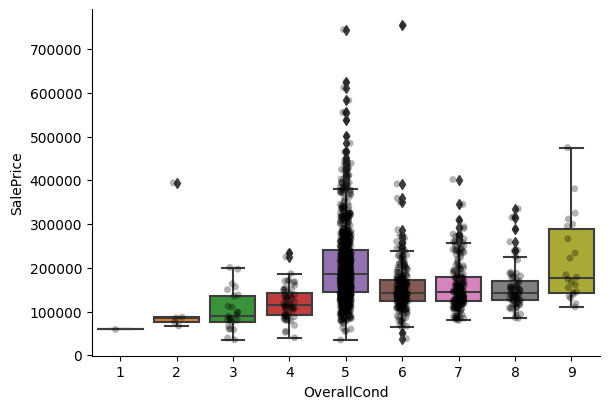

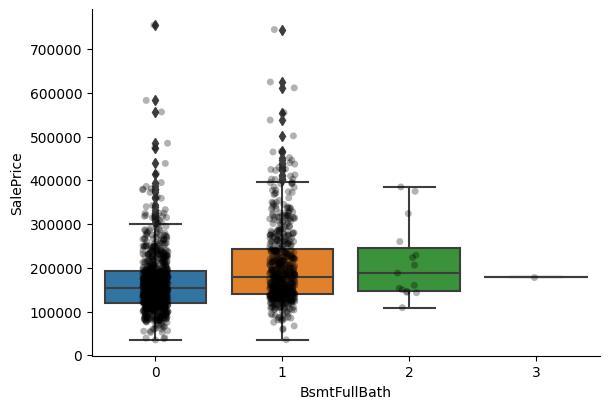

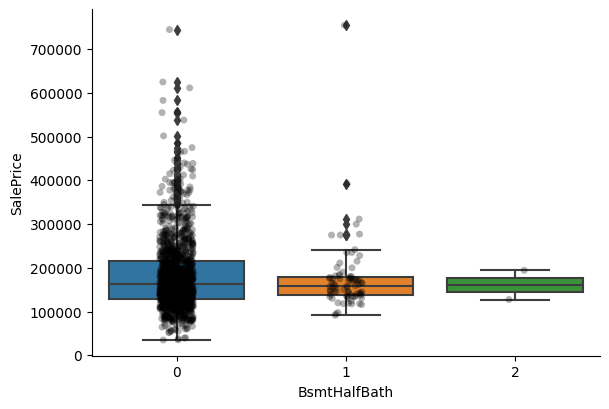

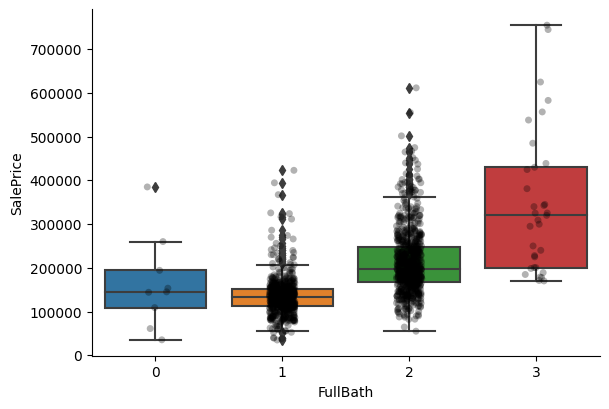

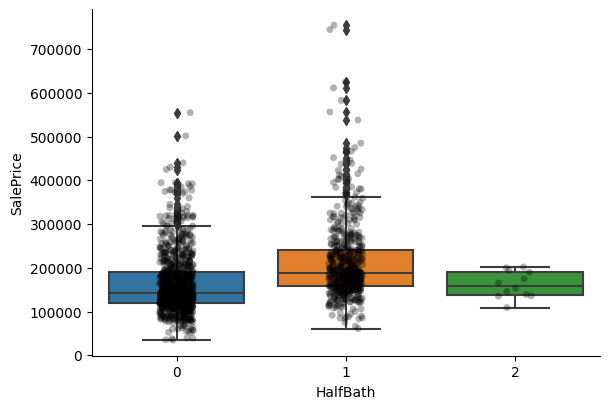

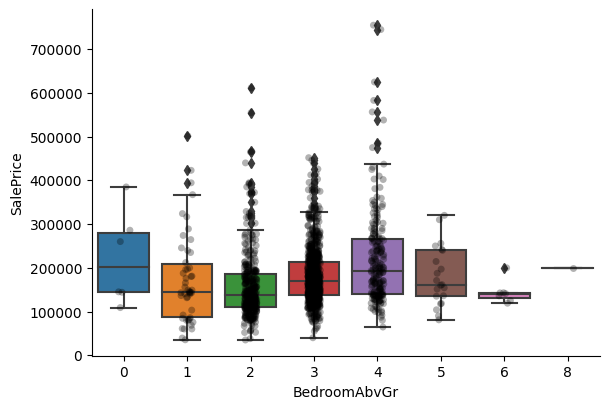

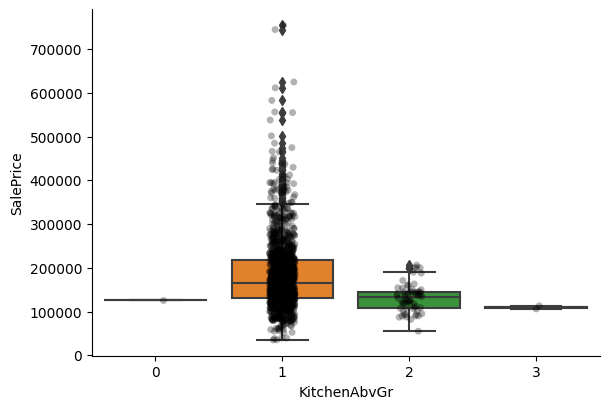

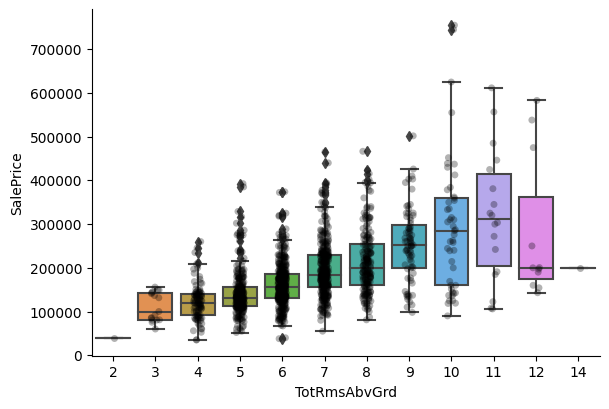

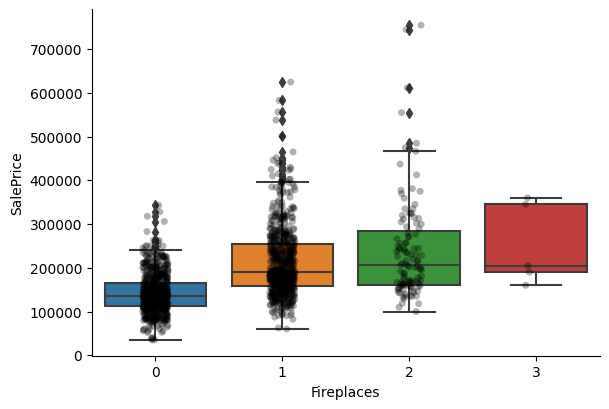

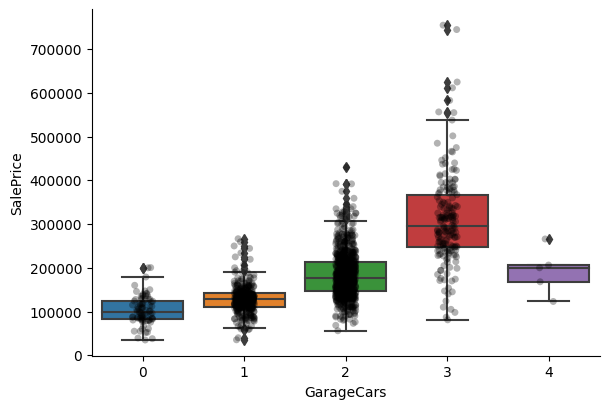

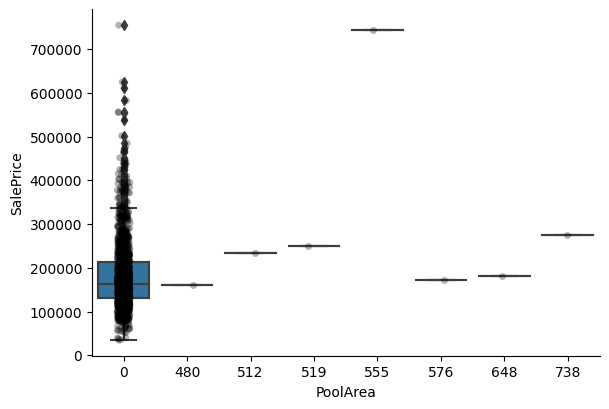

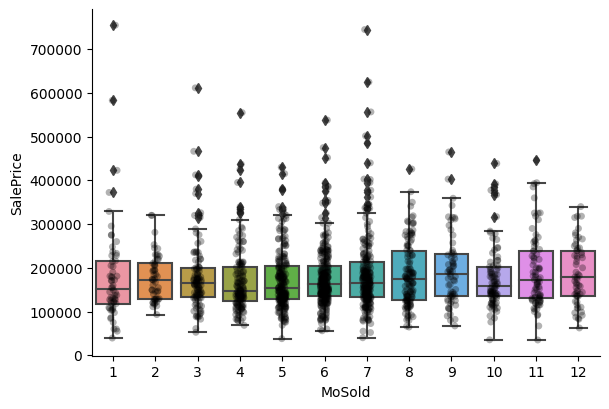

In [34]:
for var in discrete_vars:
    # make boxplot with Catplot 
    sns.catplot(x=var, y='SalePrice', data=df, kind='box', height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=df, jitter=0.1, alpha=0.3, color='k')
    plt.show()

# 4.3 Continuous variables 

Let's go ahead and find the distribution of the continuous variables. We will consider continuous variables to all 
those that are not temporal and discrete 

In [35]:
# make a list of continuous variables 
cont_vars = [var for var in num_vars if var not in discrete_vars+year_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  18


In [36]:
# let's visualise the continuous variables 

df[cont_vars].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  
0           0           61              0          0            0        0  
1         298            0              0          0            0        0  
2           0           42              0          0            0        0  
3           0           35            272          0            0        0  
4         192           84              0          0            0        0

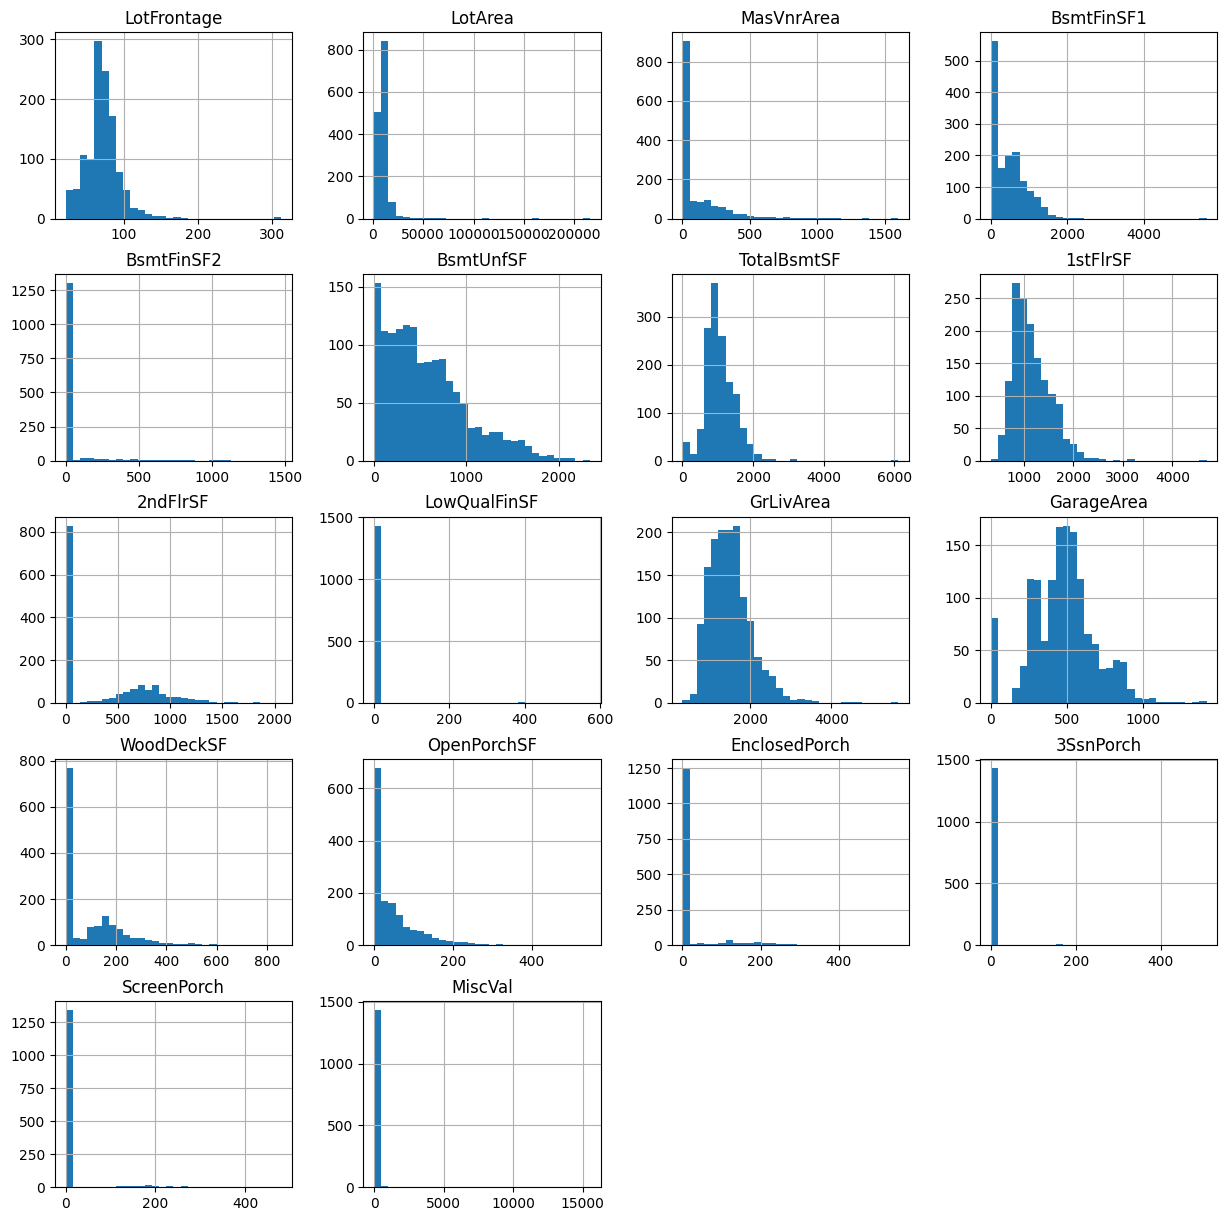

In [37]:
# let's plot histogram for all continuous variables 

df[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

The variables are not normally distributed. And there are a particular few that are extremely skewed like 3SsnPorch, ScreenPorch and MiscVal.

Sometimes, transforming the variables to improve the value spread, improves the model performance. But it is unlikely that a transformation will help change the distribution of the super skewed variables dramatically.

We can apply a Yeo-Johnson transformation to variables like LotFrontage, LotArea, BsmUnfSF, and a binary transformation to variables like 3SsnPorch, ScreenPorch and MiscVal.

Let's go ahead and do that.

In [38]:
# first make a list with the super skewed variables 
# for later 

skewed=['BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal']

In [39]:
# capture the remaining continuous variables

cont_vars = [
    'LotFrontage',
    'LotArea',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
]

In [40]:
df.dropna(subset=['LotFrontage','MasVnrArea'],inplace=True)

In [41]:
df[['LotFrontage','MasVnrArea']].isnull().sum()

LotFrontage    0
MasVnrArea     0
dtype: int64

# 4.3.1 Yeo-Johnson transformation 

C:\Users\hi\anaconda4\lib\site-packages\scipy\stats\morestats.py:1476: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))
C:\Users\hi\anaconda4\lib\site-packages\scipy\optimize\optimize.py:2555: RuntimeWarning: invalid value encountered in scalar divide
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
C:\Users\hi\anaconda4\lib\site-packages\scipy\optimize\optimize.py:2148: RuntimeWarning: invalid value encountered in scalar subtract
  tmp1 = (x - w) * (fx - fv)
C:\Users\hi\anaconda4\lib\site-packages\scipy\optimize\optimize.py:2149: RuntimeWarning: invalid value encountered in scalar subtract
  tmp2 = (x - v) * (fx - fw)


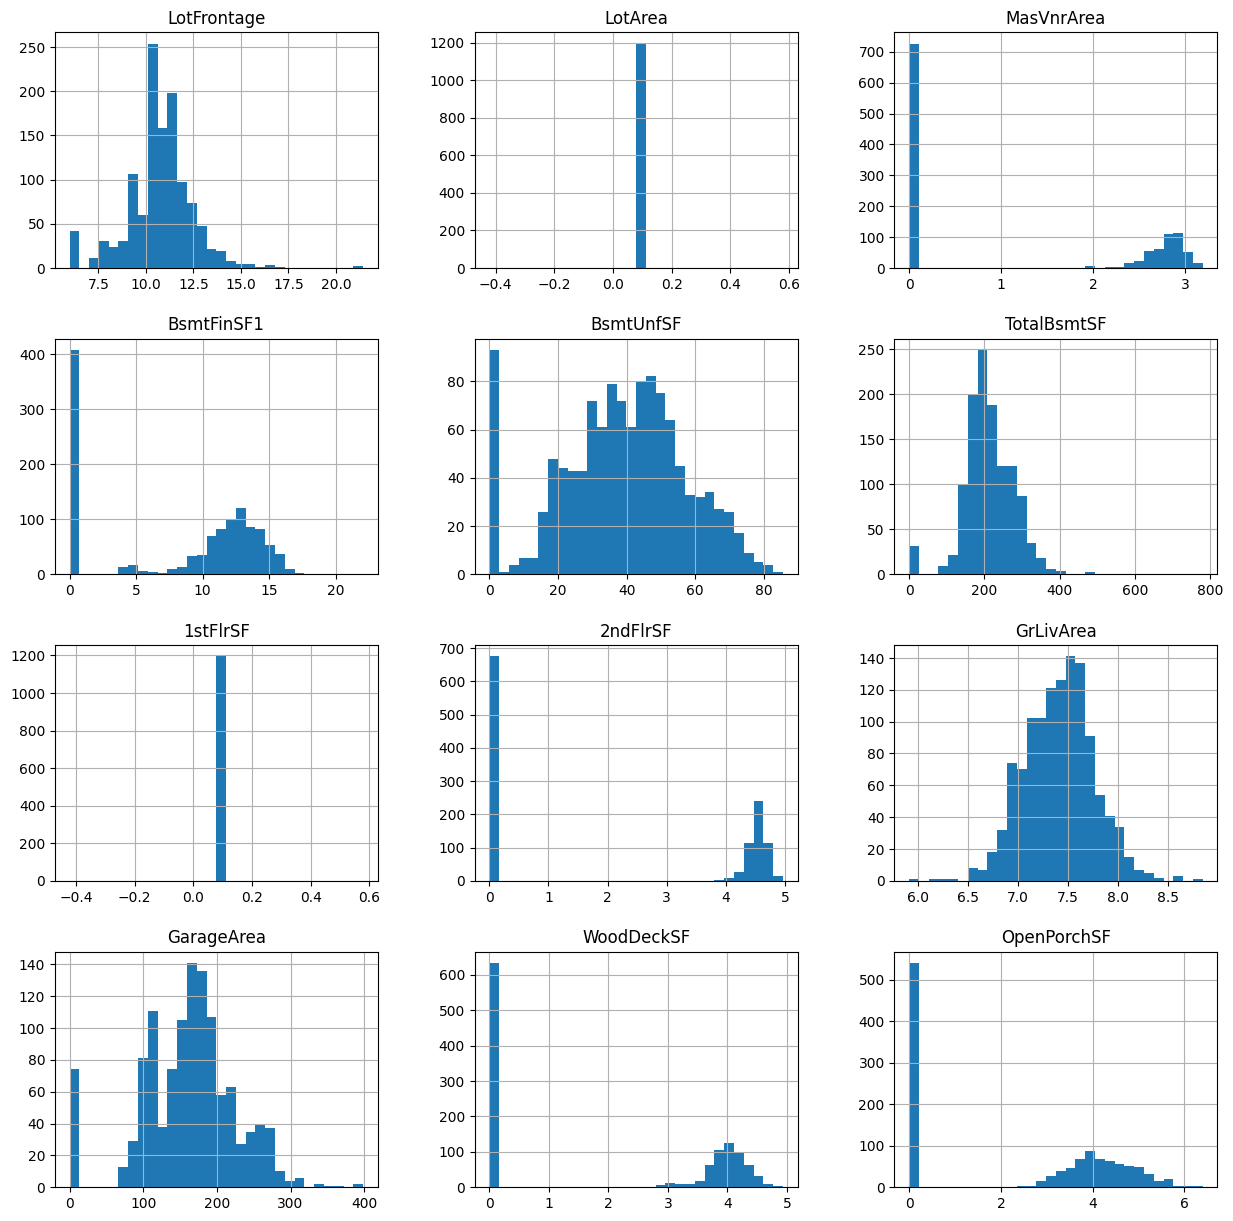

In [42]:
# Let's go ahead and analyse the distributions of the variables
# after applying a yeo-johnson transformation

# temporary copy of the data
tmp = df.copy()

for var in cont_vars:

    # transform the variable - yeo-johsnon
    tmp[var], param = stats.yeojohnson(df[var])

    
# plot the histograms of the transformed variables
tmp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

For LotFrontage and MasVnrArea the transformation did not do an amazing job. 

For the others, the values seem to be spread more evenly in the range.

Whether this helps improve the predictive power, remains to be seen. To determine if this is the case, we should train a model with the original values and one with the transformed values, and determine model performance, and feature importance. But that escapes the scope of this course.

Here, we will do a quick visual exploration here instead:

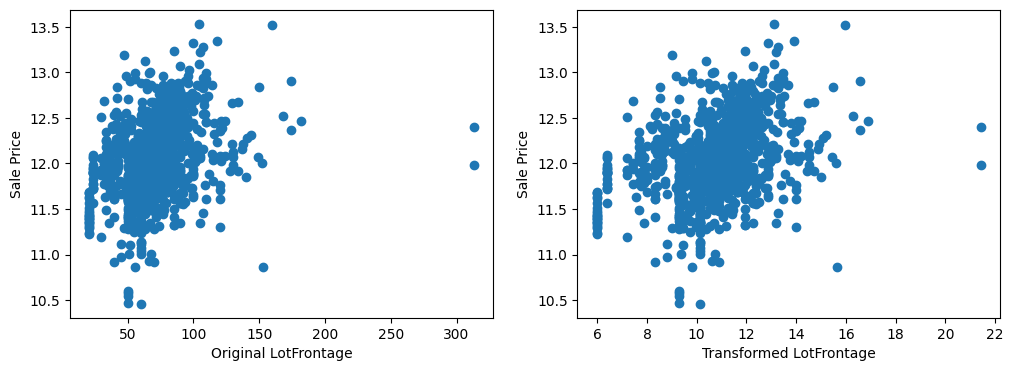

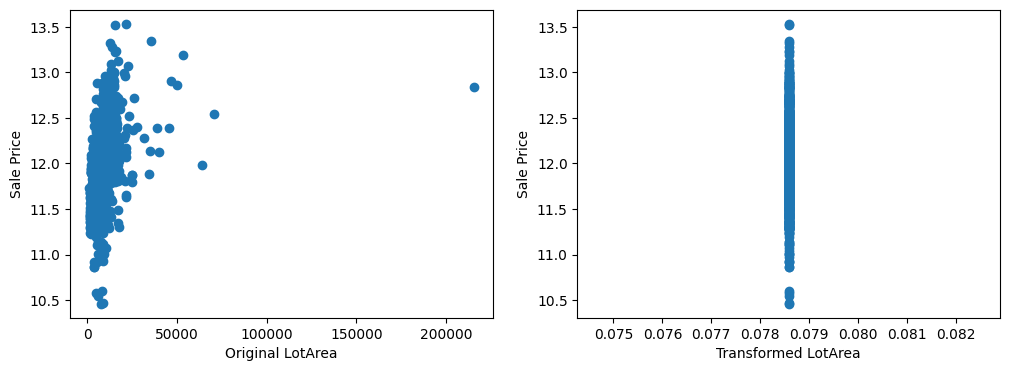

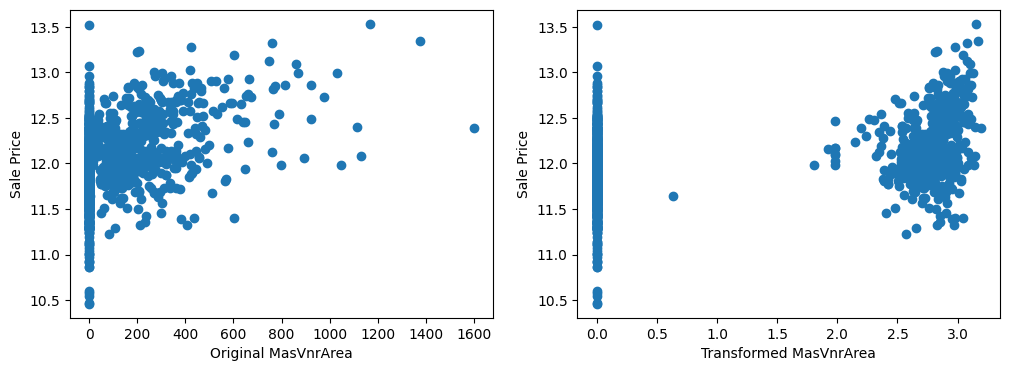

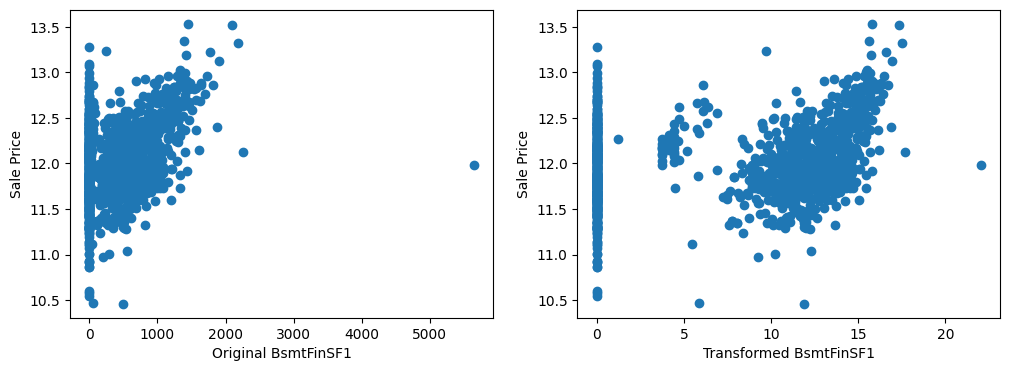

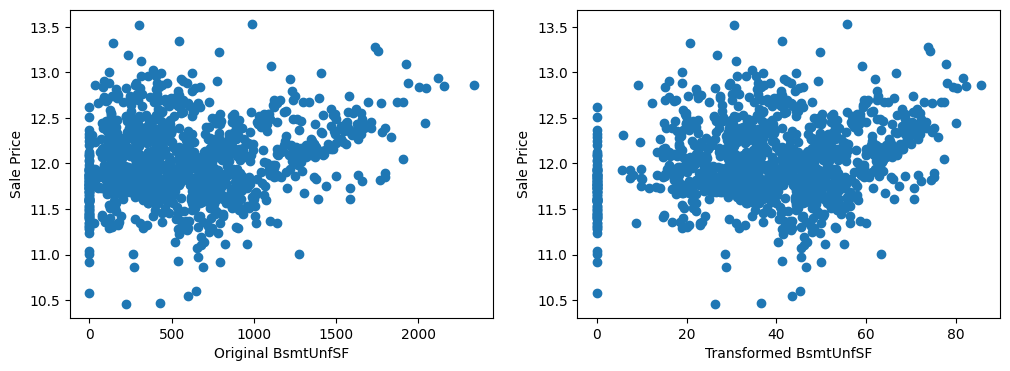

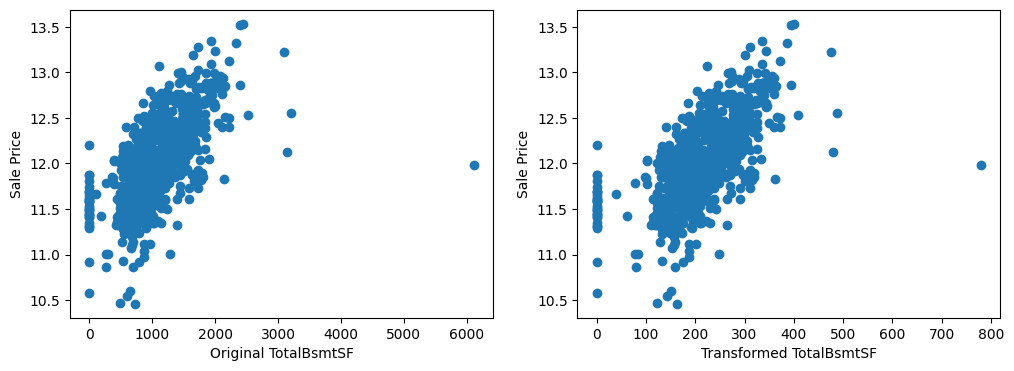

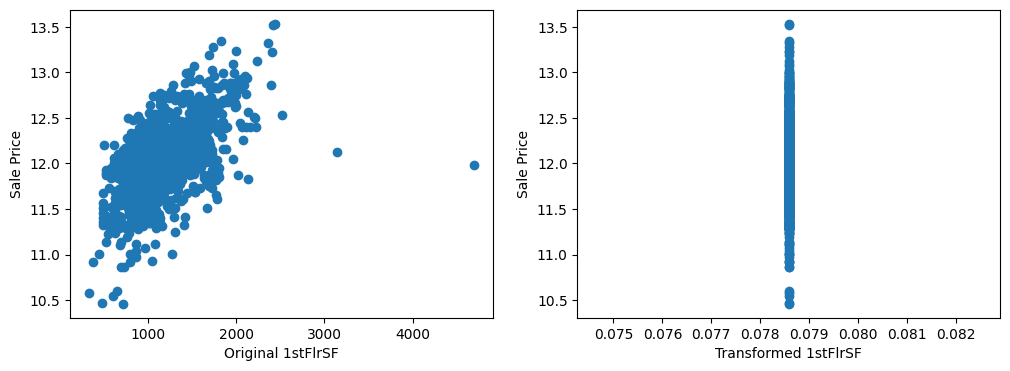

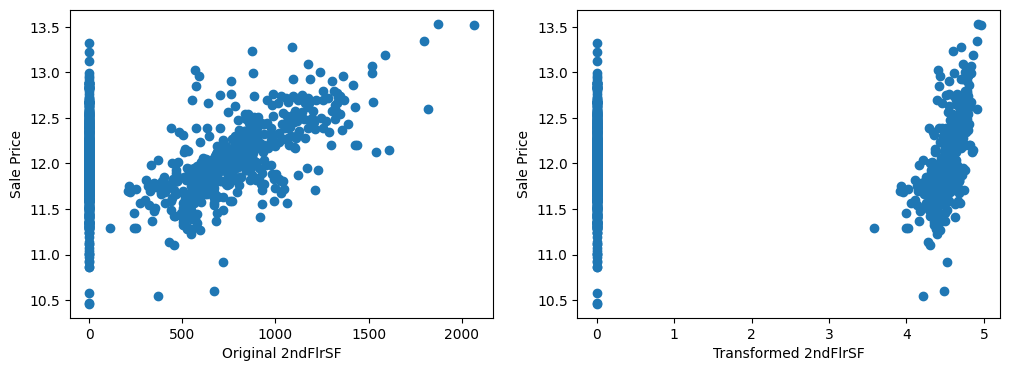

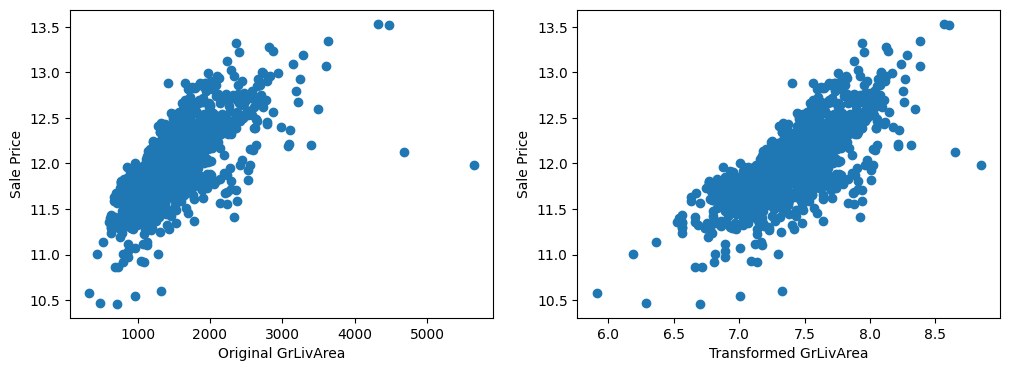

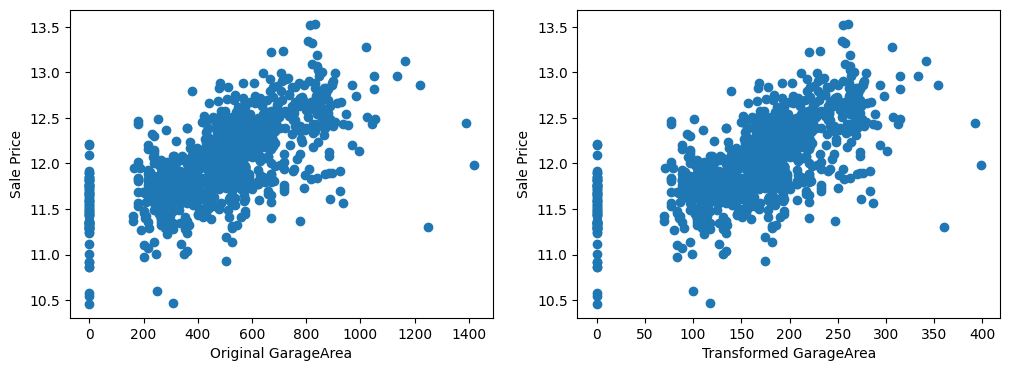

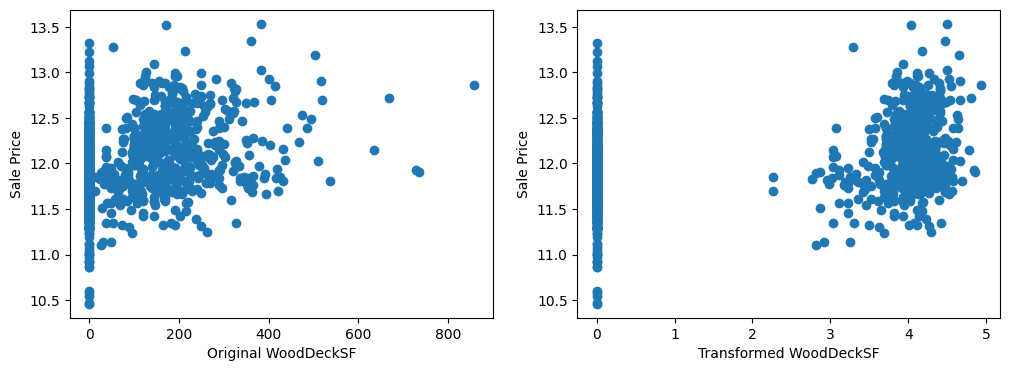

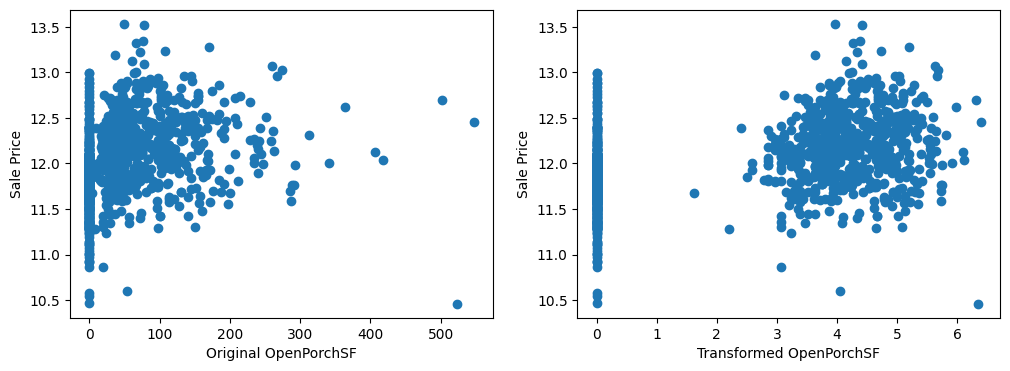

In [43]:
# let's plot the original or transformed variables
# vs sale price, and see if there is a relationship

for var in cont_vars:
    
    plt.figure(figsize=(12,4))
    
    # plot the original variable vs sale price    
    plt.subplot(1, 2, 1)
    plt.scatter(df[var], np.log(df['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)
                
    plt.show()

By eye, the transformations seems to improve the relationship only for LotArea.

Let's try a different transformation now. Most variables contain the value 0, and thus we can't apply the logarithmic transformation, but we can certainly do that for the following variables:

 ["LotFrontage", "1stFlrSF", "GrLivArea"]
 
 So let's do that and see if that changes the variable distribution and its relationship with the target.
 
 ### Logarithmic transformation

# 4.3.2 Logarithmic transformation 

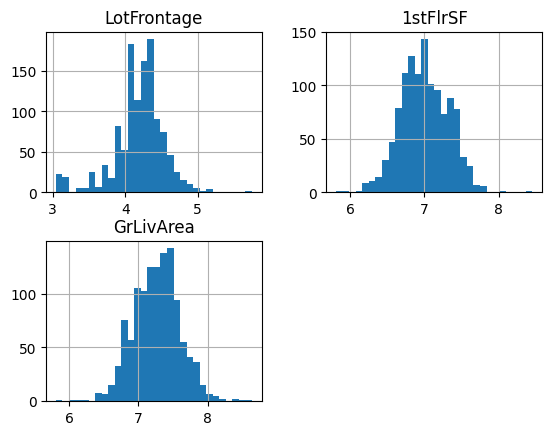

In [44]:
# Let's go ahead and analyse the distributions of these variables
# after applying a logarithmic transformation

tmp = df.copy()

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:

    # transform the variable with logarithm
    tmp[var] = np.log(df[var])
    
tmp[["LotFrontage", "1stFlrSF", "GrLivArea"]].hist(bins=30)
plt.show()

The distribution of the variables are now more 'Gaussian' looking.

Let's go ahead and evaluate their relationship with the target.

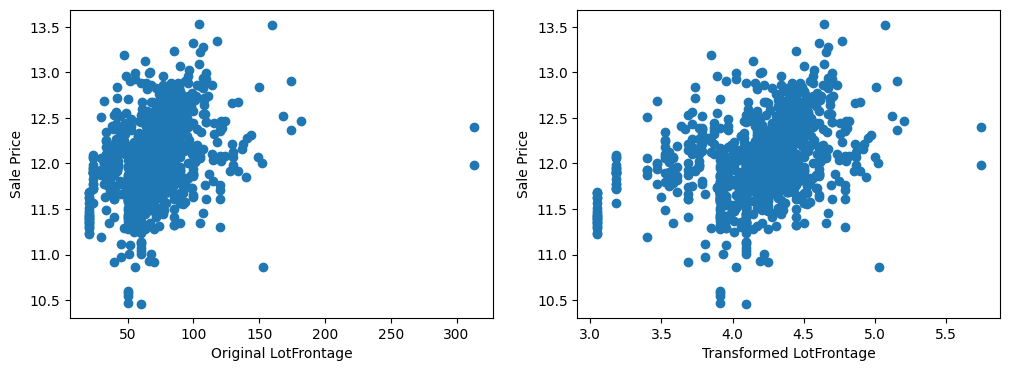

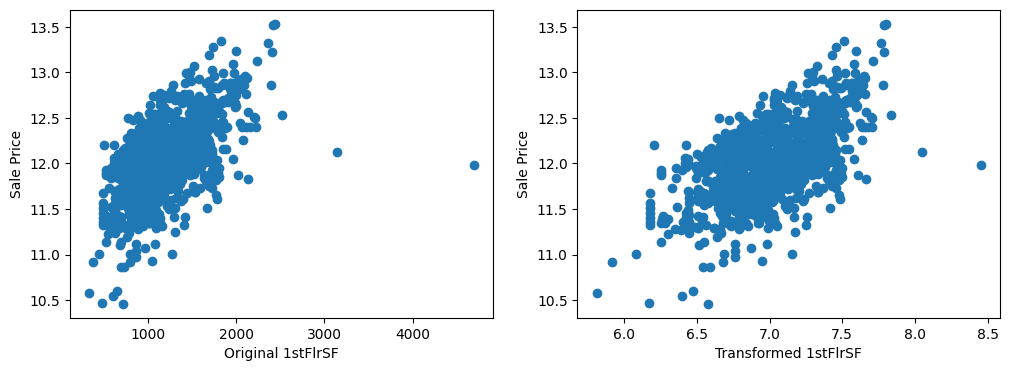

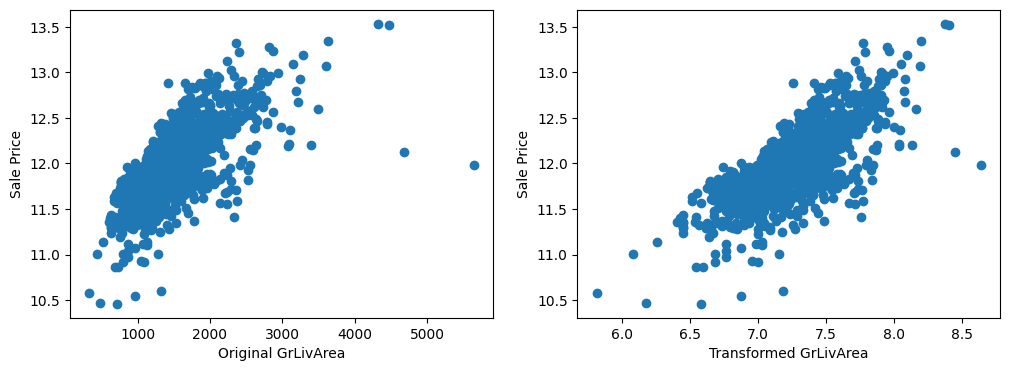

In [45]:
# let's plot the original or transformed variables
# vs sale price, and see if there is a relationship

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    
    plt.figure(figsize=(12,4))
    
    # plot the original variable vs sale price    
    plt.subplot(1, 2, 1)
    plt.scatter(df[var], np.log(df['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)
                
    plt.show()

The transformed variables have a better spread of the values, which may in turn, help make better predictions.

# 4.4 Skewed variables

Let's transform them into binary variables and see how predictive they are:

In [46]:
for var in skewed:
    print(var)

BsmtFinSF2
LowQualFinSF
EnclosedPorch
3SsnPorch
ScreenPorch
MiscVal


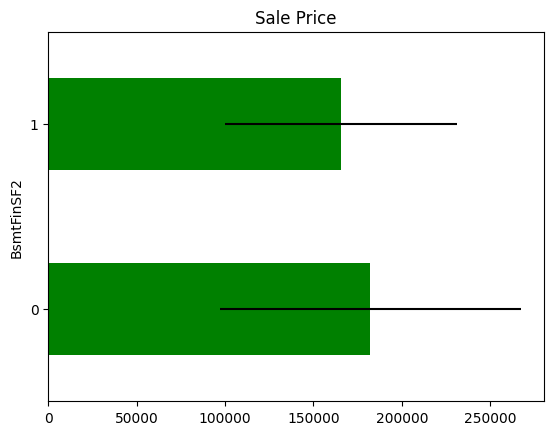

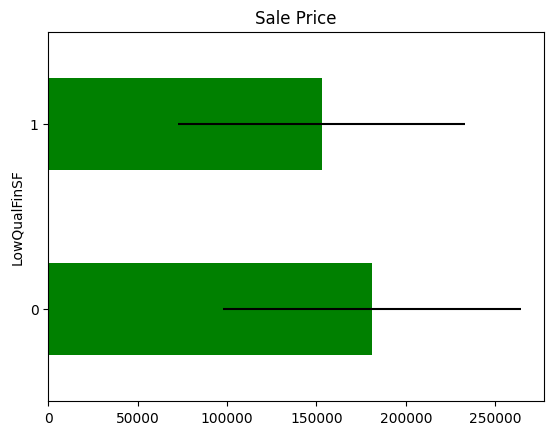

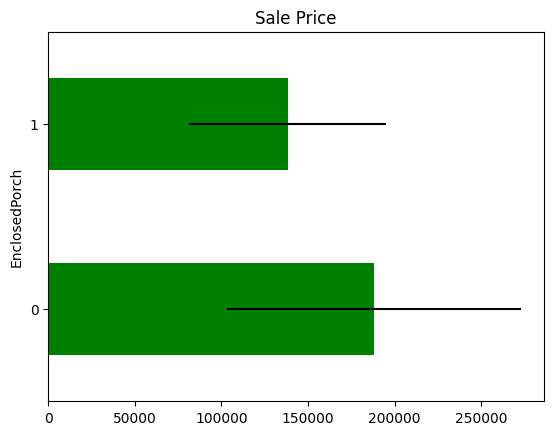

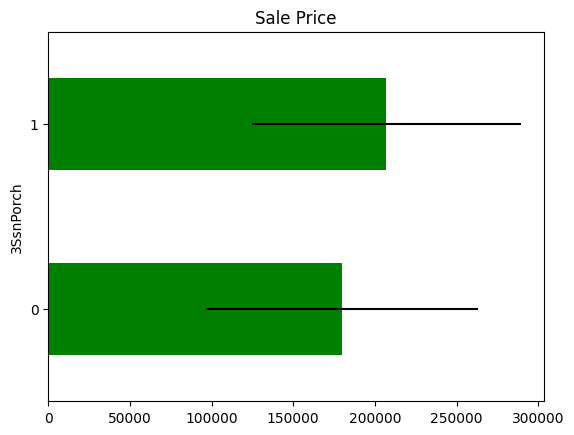

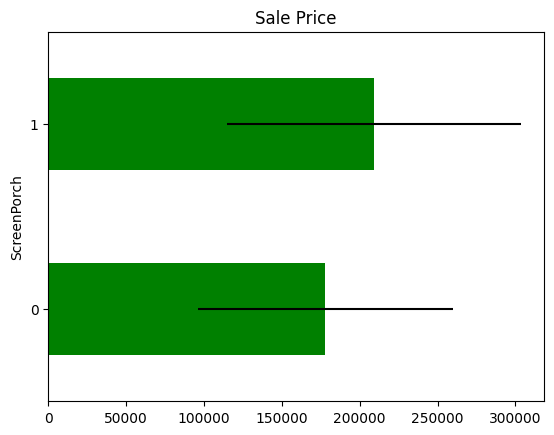

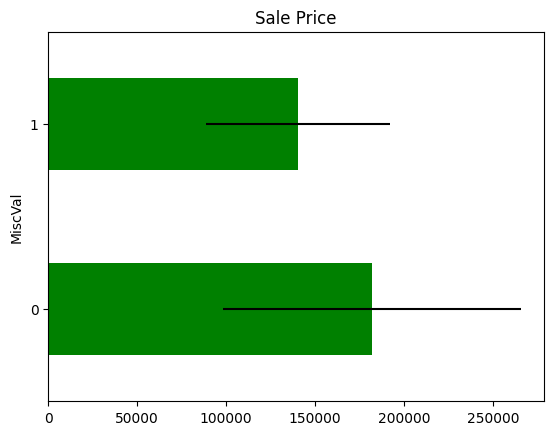

In [47]:
for var in skewed:
    
    tmp = df.copy()
    
    # map the variable values into 0 and 1
    tmp[var] = np.where(df[var]==0, 0, 1)
    
    # determine mean sale price in the mapped values
    tmp = tmp.groupby(var)['SalePrice'].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='green')

    plt.show()

There seem to be a difference in Sale Price in the mapped values, but the confidence intervals overlap, so most likely this is not significant or predictive.

In [48]:
catego = df.select_dtypes(exclude=np.number)

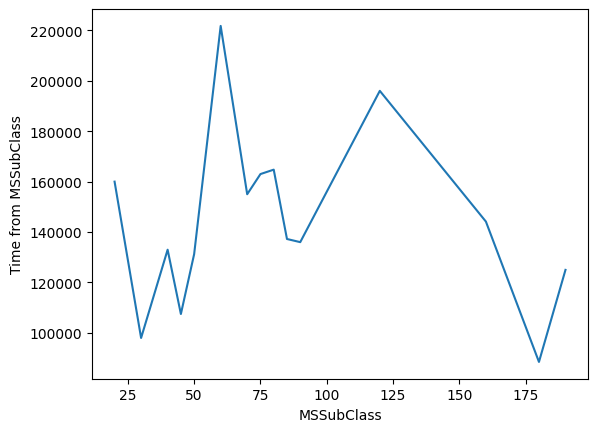

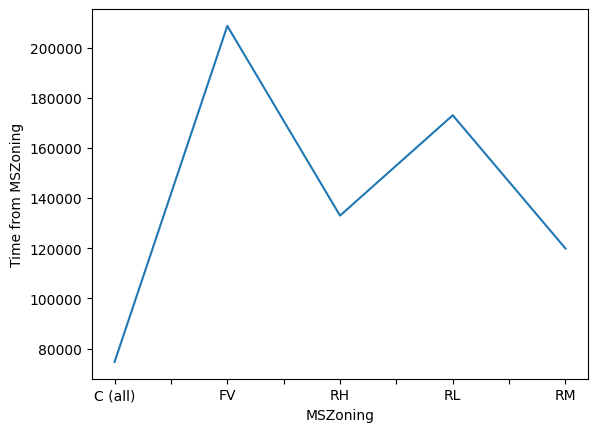

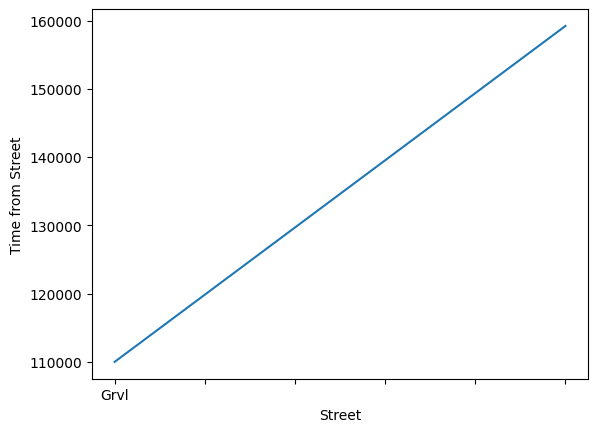

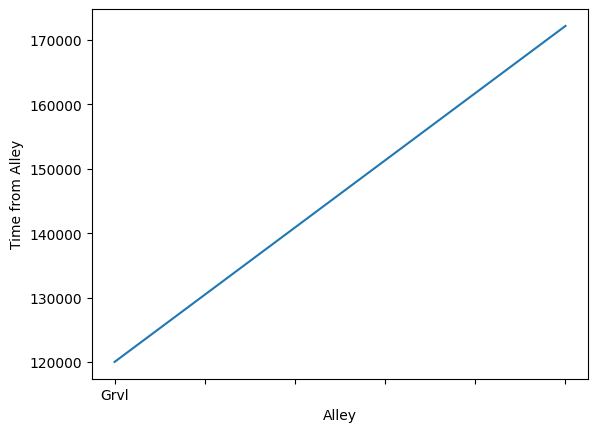

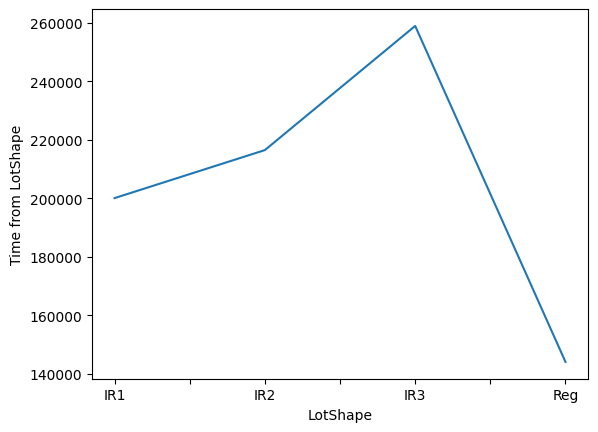

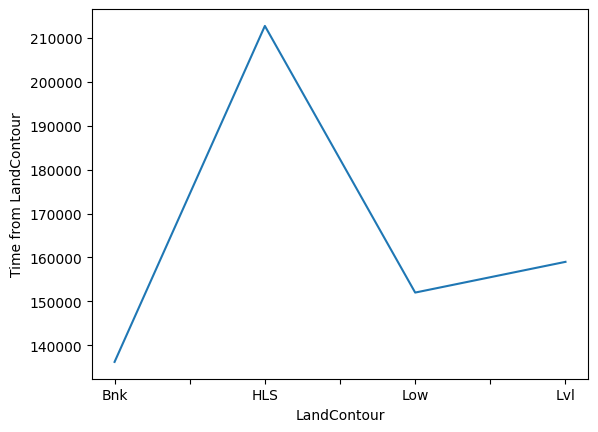

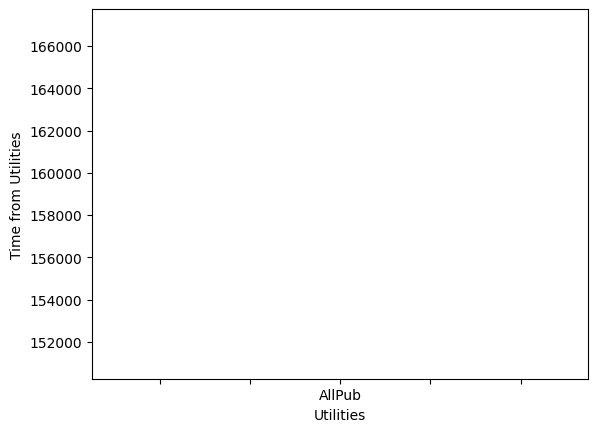

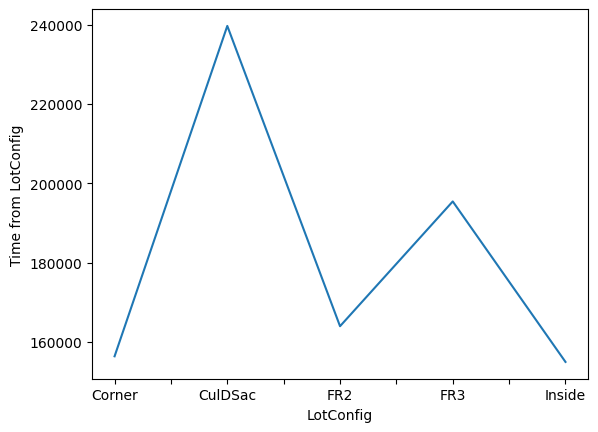

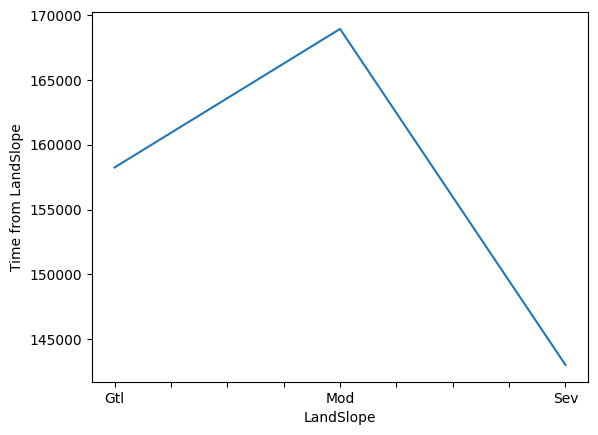

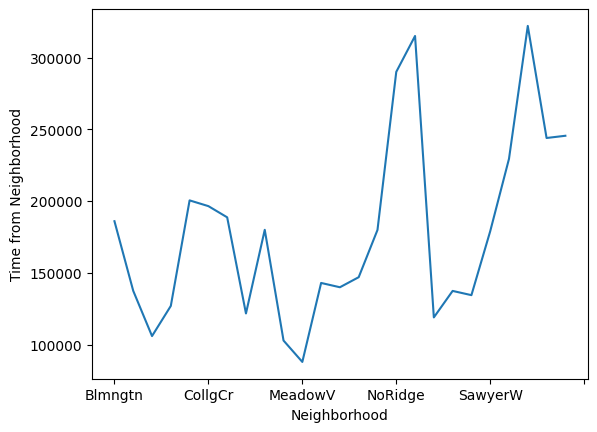

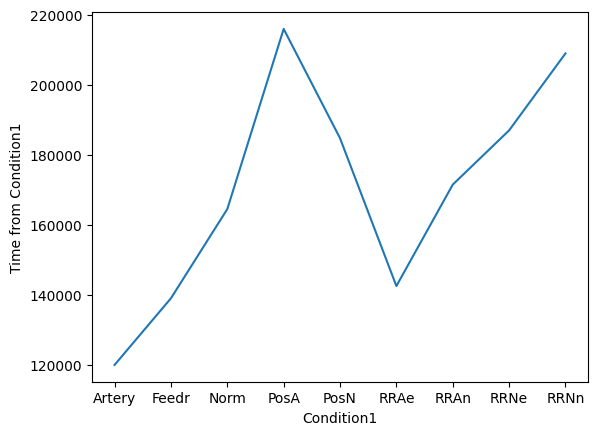

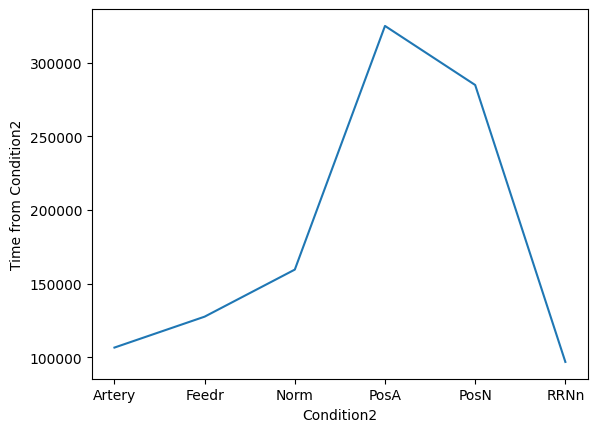

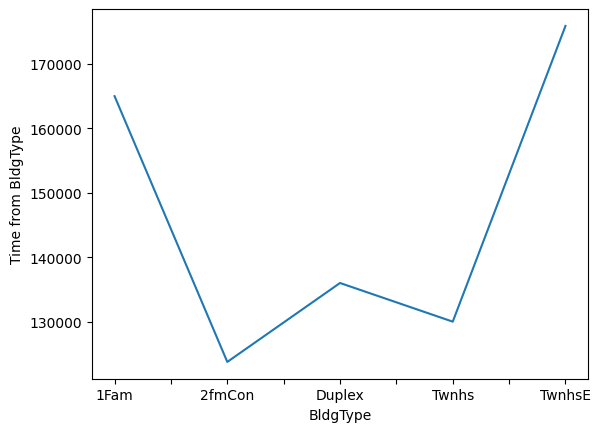

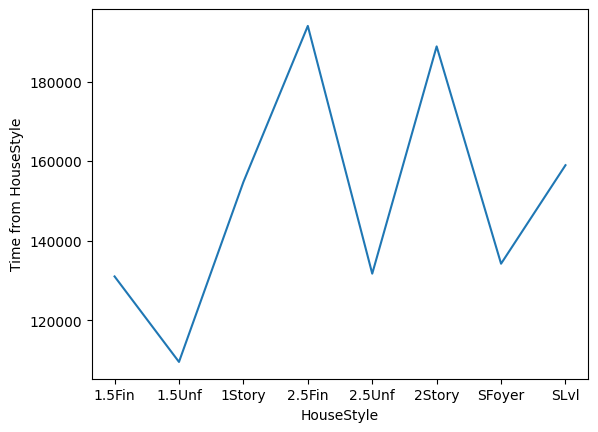

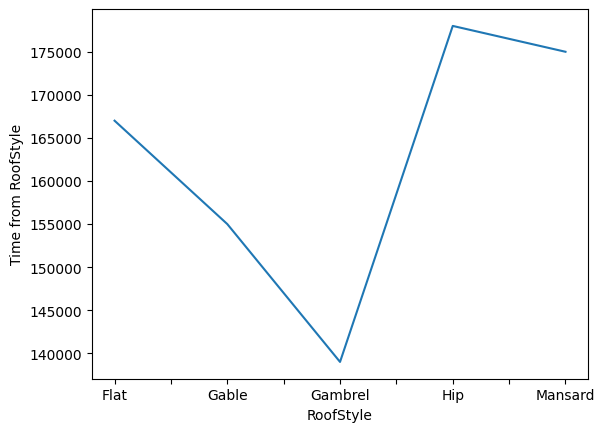

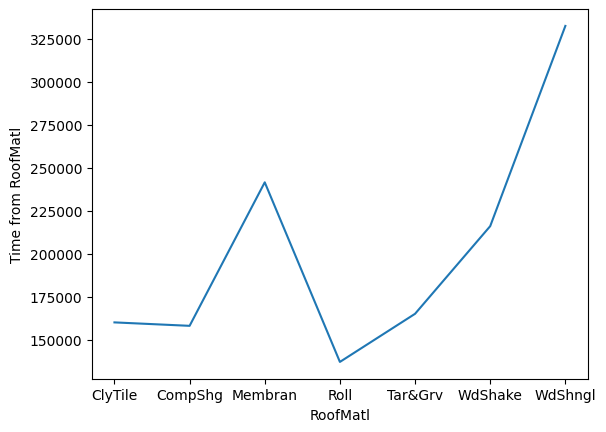

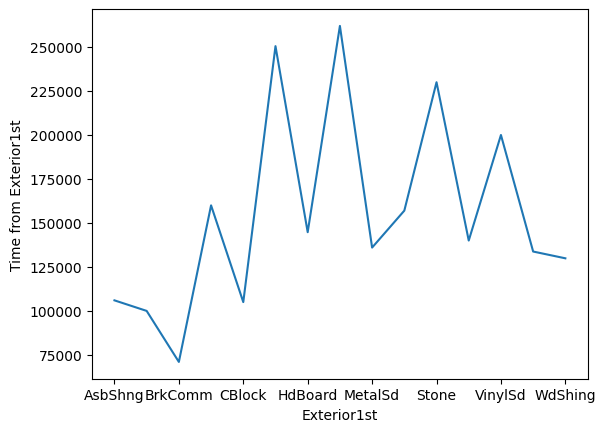

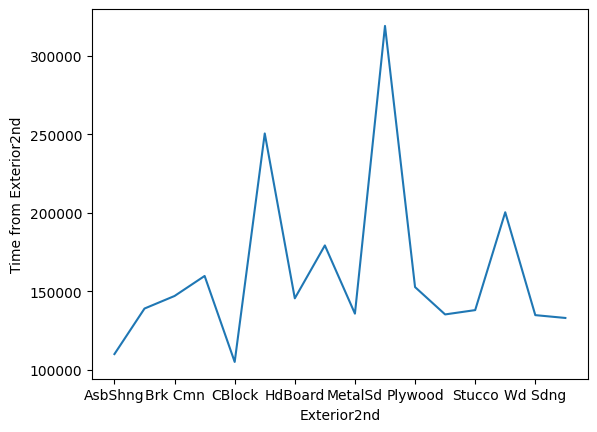

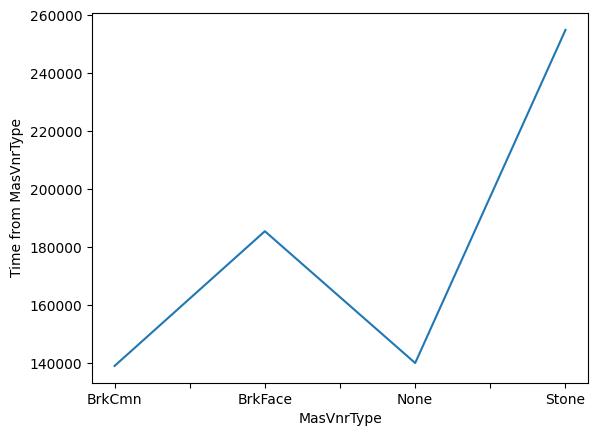

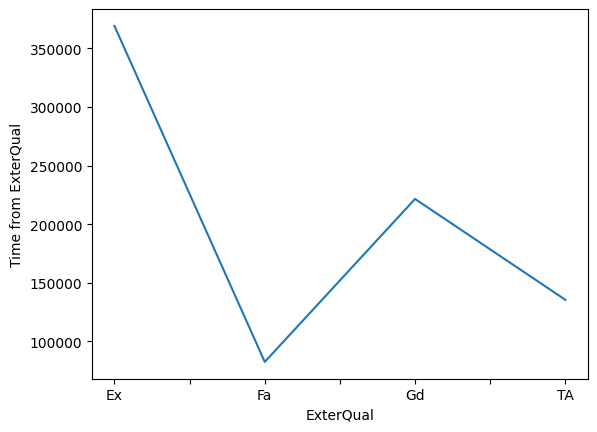

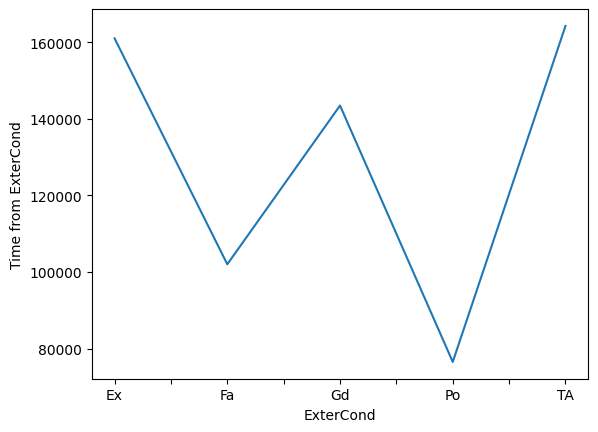

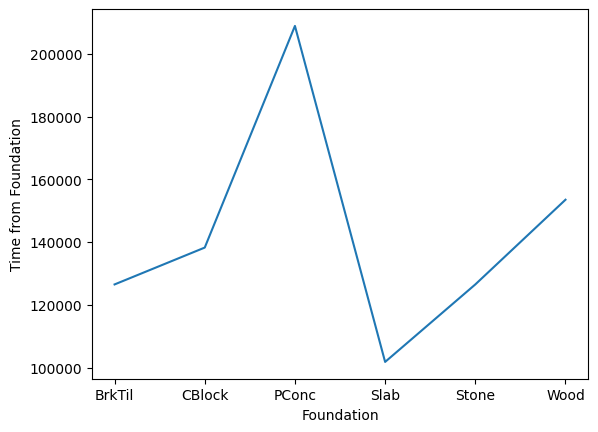

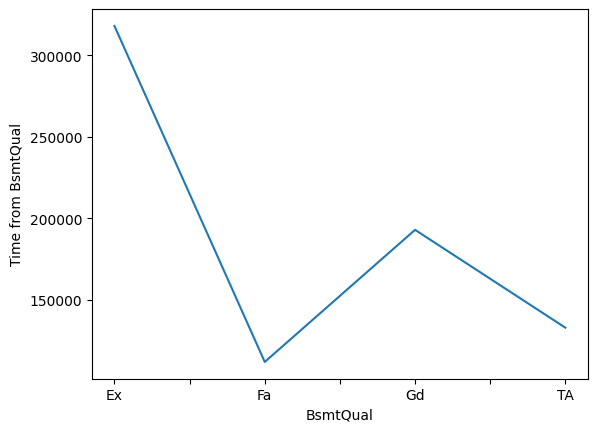

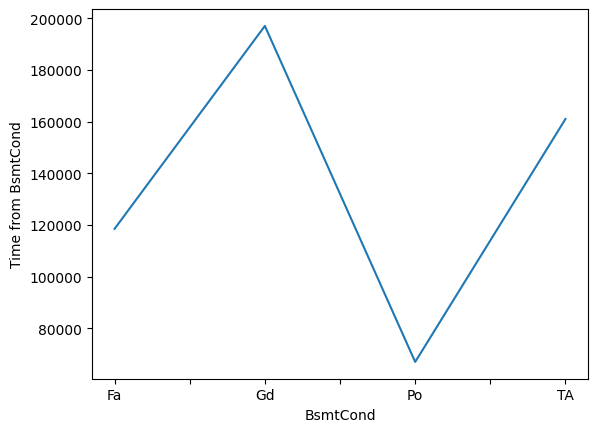

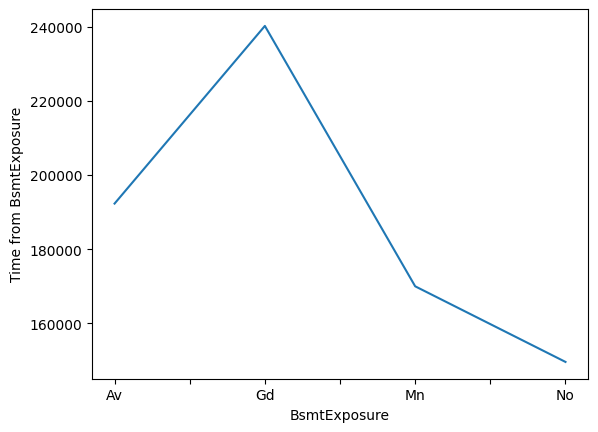

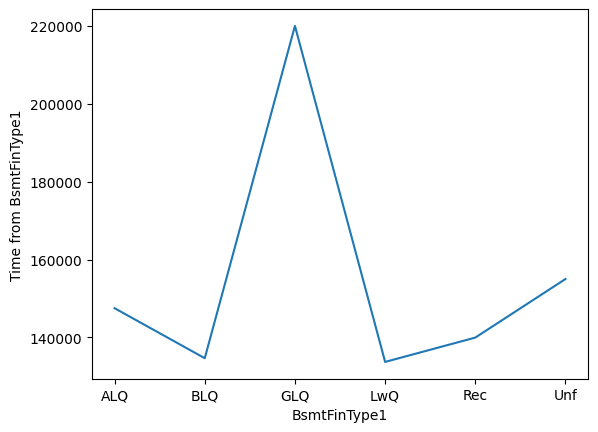

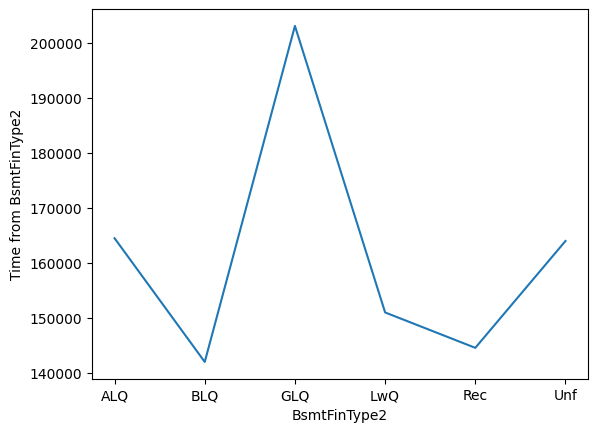

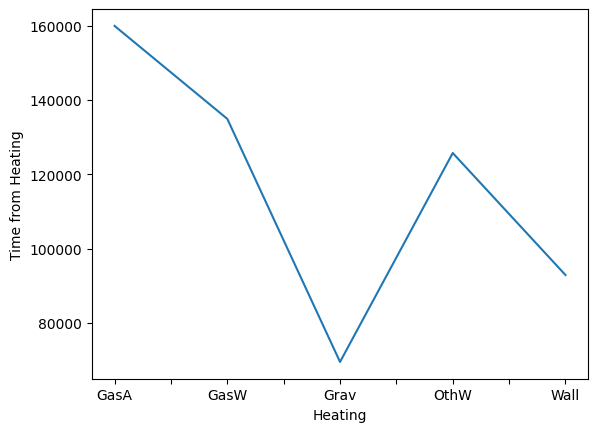

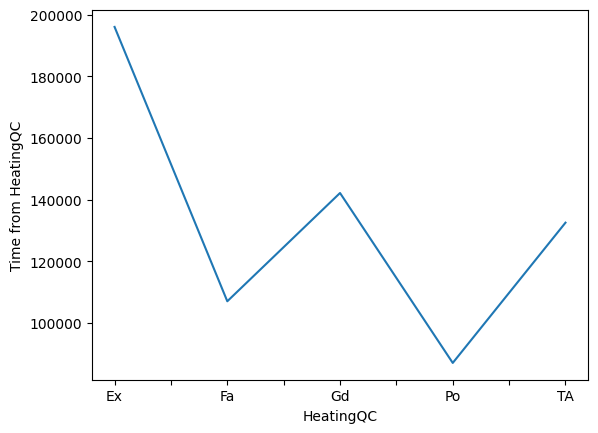

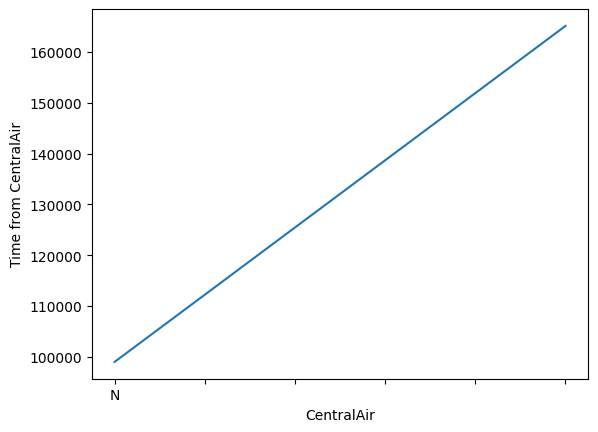

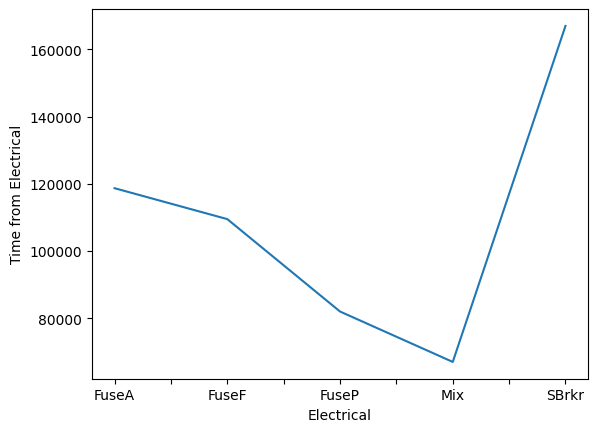

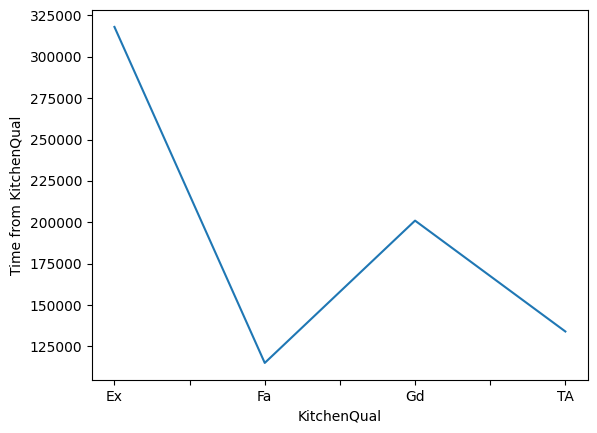

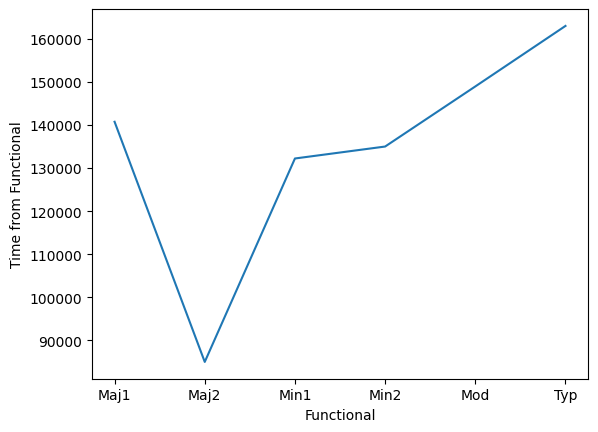

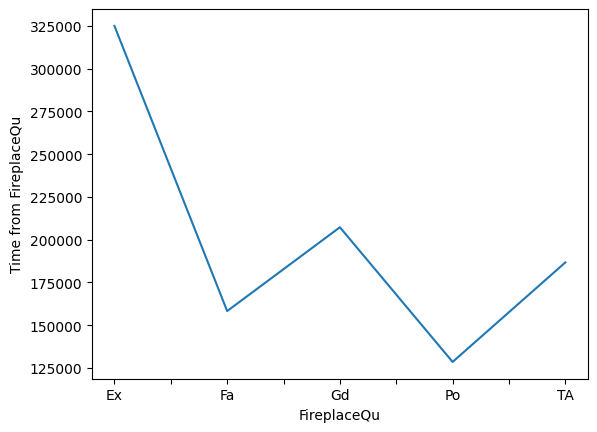

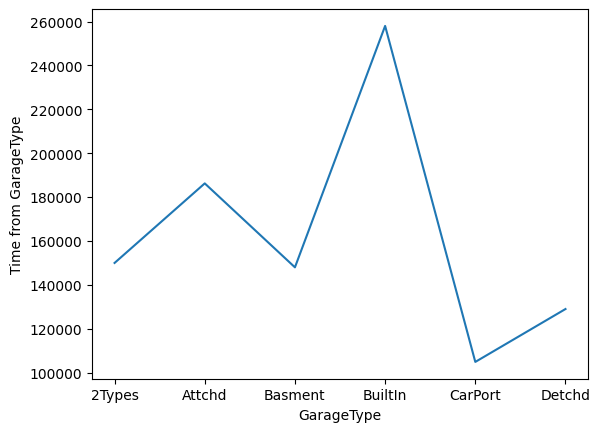

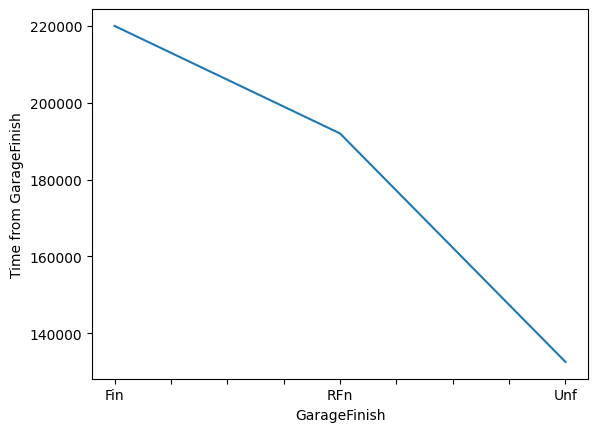

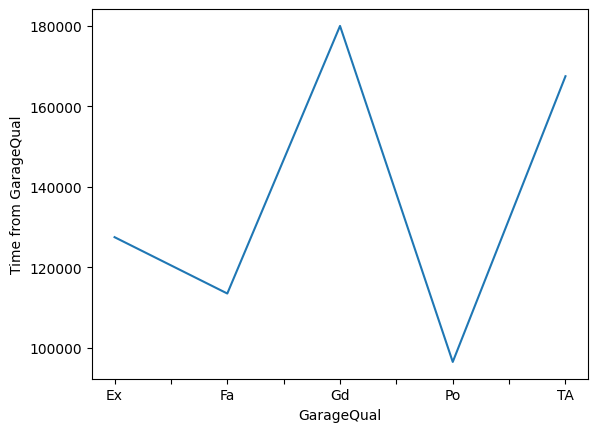

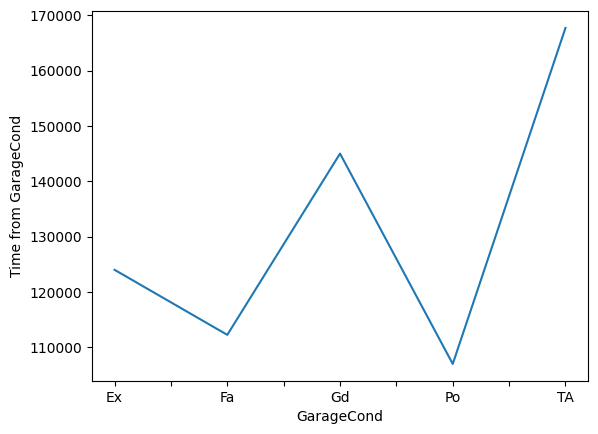

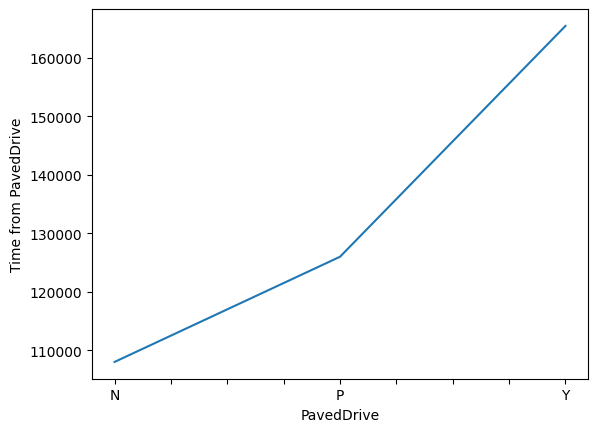

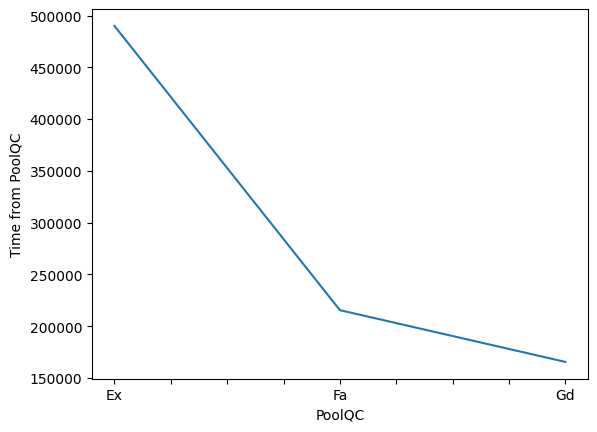

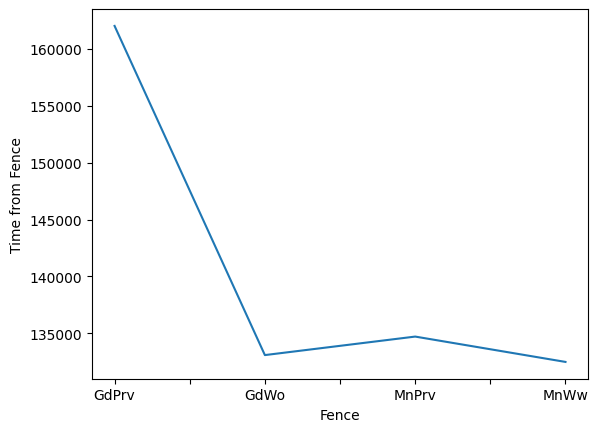

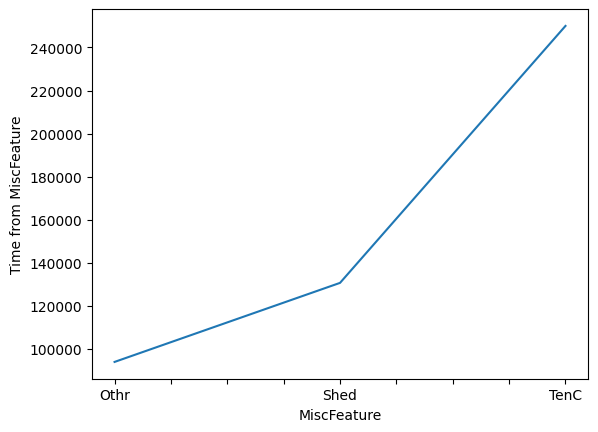

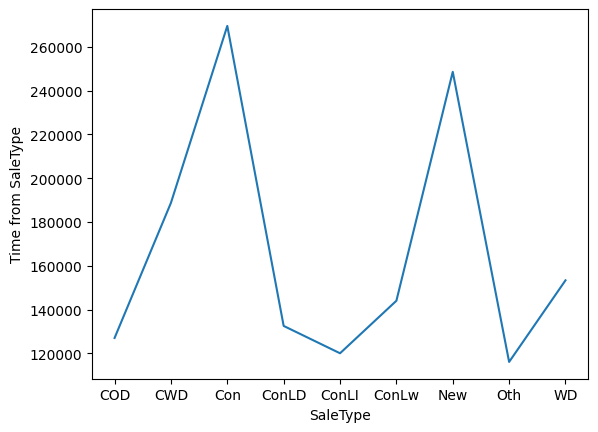

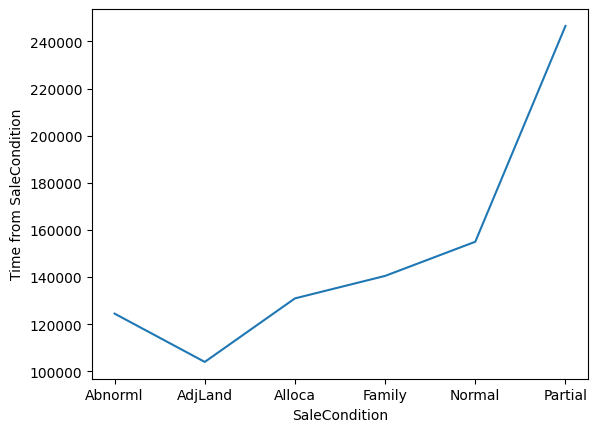

In [49]:
def analyse_year_vars(df,var):
    
    df = df.copy()
    
  
    
    df.groupby(var)['SalePrice'].median().plot()
    plt.ylabel('Time from '+ var)
    plt.show()
    
    
for var in catego:
    analyse_year_vars(df,var) 

# 5 Categorical Variables 

Let's go ahead and analyse the categorical variables present in the dataset

In [50]:
print('Number of categorical variables: ', len(categorical_var))

Number of categorical variables:  44


In [51]:
# let's visualise the values of the categorical variables 
df[categorical_var].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition MSSubClass  
0       WD        Normal         60  
1       WD        Normal         20  
2       WD        Normal         60  
3       WD       Abnorml         70  
4       WD        Normal         60

# 5.1 Number of labels: cardinality 

Let's evaluate how many different categories are present in each of the variables.

<AxesSubplot:>

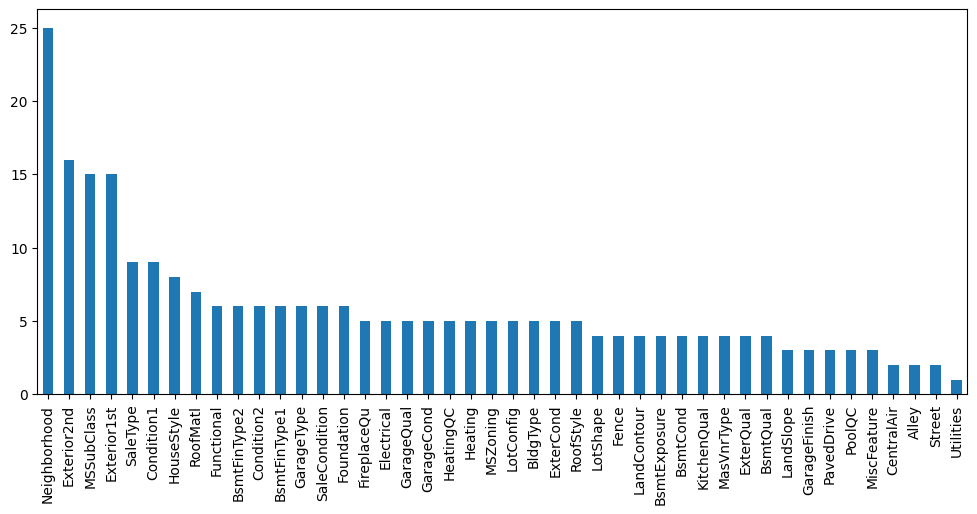

In [52]:
# we count unique categories with pandas unique()
# and then plot them in descending order 

df[categorical_var].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

All the categorical variables show low cardinality, this means that they have only few different labels. That is good as we won't need to tackle cardinality during our feature engineering lecture.

## Quality variables

There are a number of variables that refer to the quality of some aspect of the house, for example the garage, or the fence, or the kitchen. I will replace these categories by numbers increasing with the quality of the place or room.

The mappings can be obtained from the Kaggle Website. One example:

- Ex = Excellent
- Gd = Good
- TA = Average/Typical
- Fa =	Fair
- Po = Poor

In [53]:
# re-map strings to numbers, which determine quality 

qual_mappings = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5,'Missing':0,'NA':0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]

for var in qual_vars:
    df[var] = df[var].map(qual_mappings)

In [54]:
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [55]:
exposure_mappings = {'No':1, 'Min':2,'Av':3,'Gd':4,'Missing':0,'Na':0}

var = 'BsmtExposure'

df[var] = df[var].map(exposure_mappings)

In [56]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    df[var] = df[var].map(finish_mappings)

In [57]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

df[var] = df[var].map(garage_mappings)

In [58]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

df[var] = df[var].map(fence_mappings)

In [59]:
# capture all quality variables

qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']



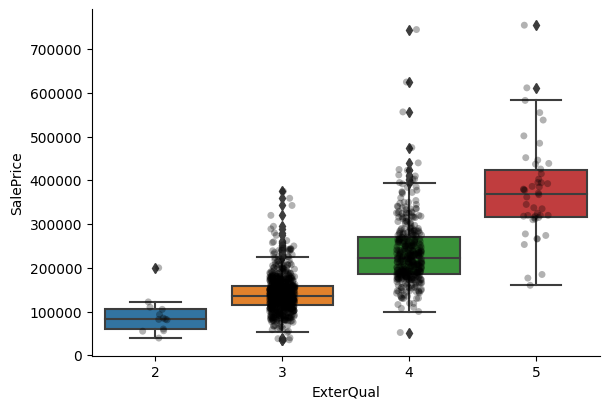

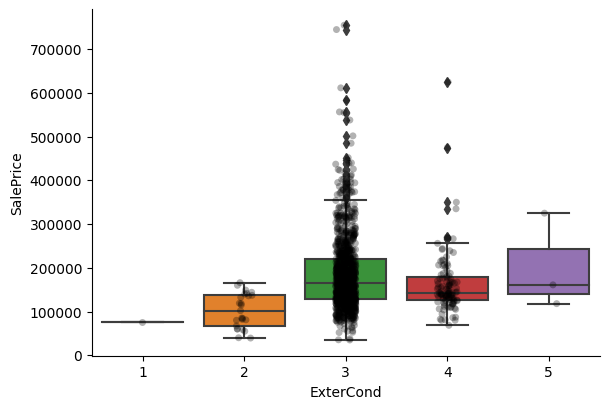

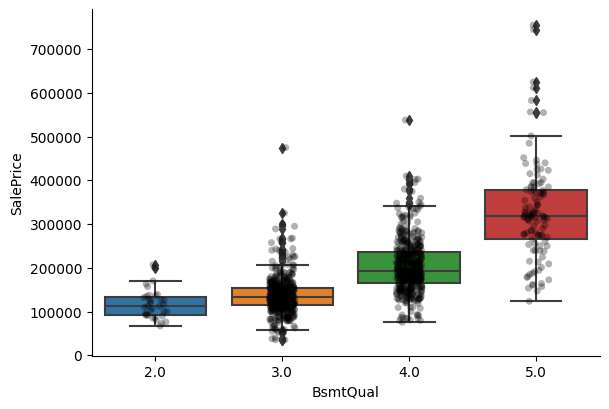

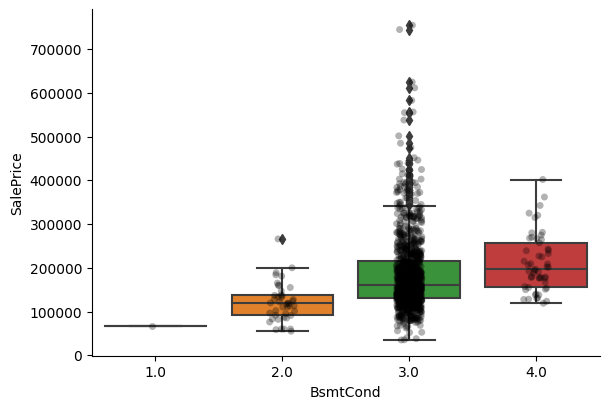

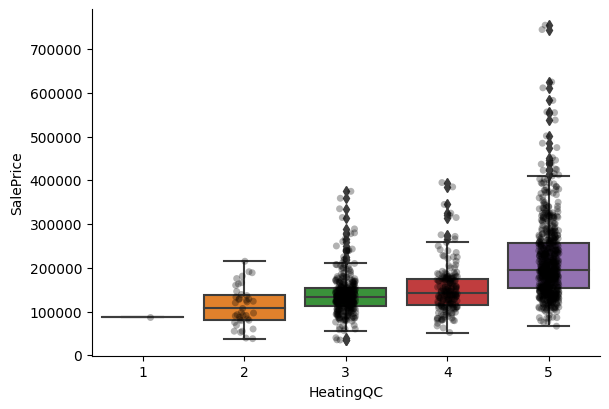

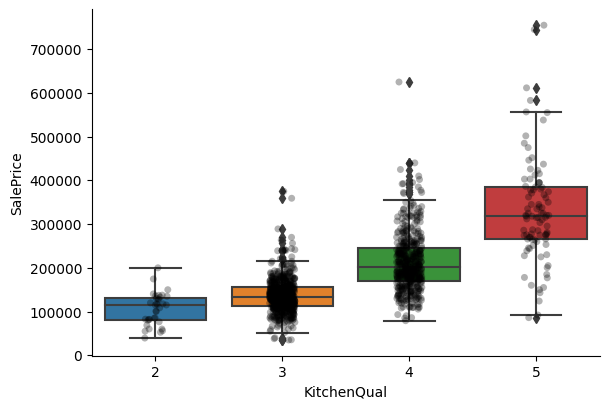

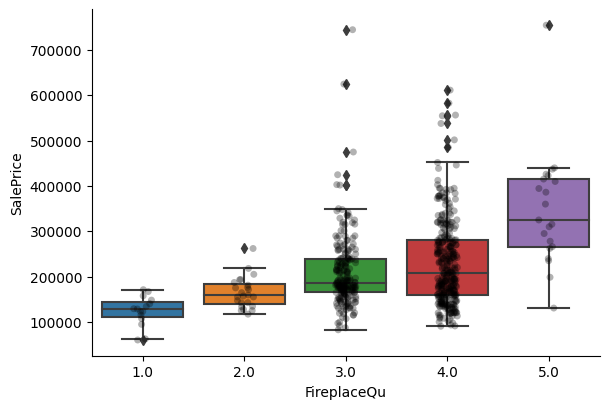

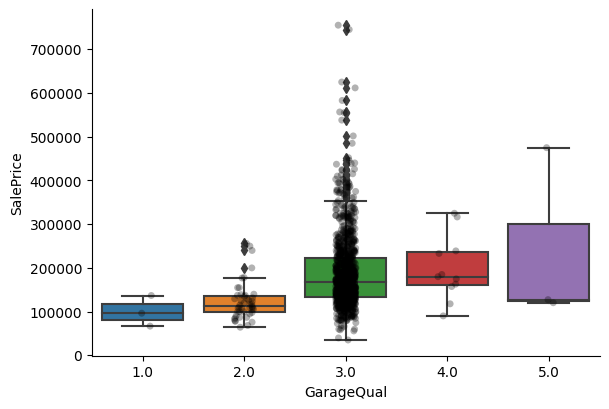

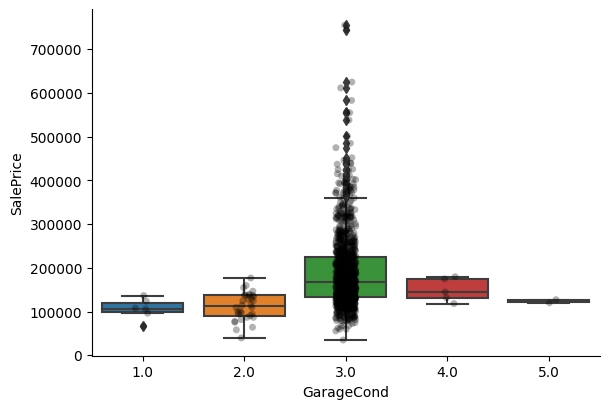

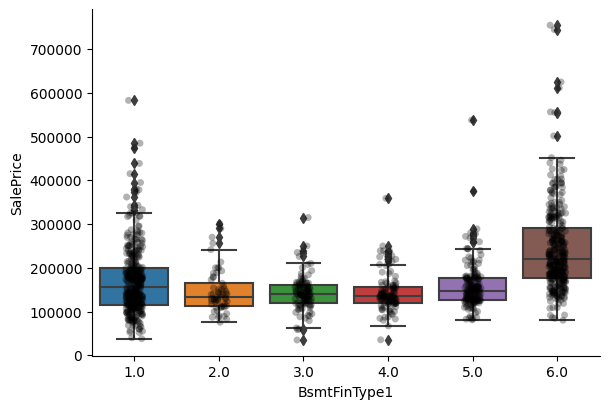

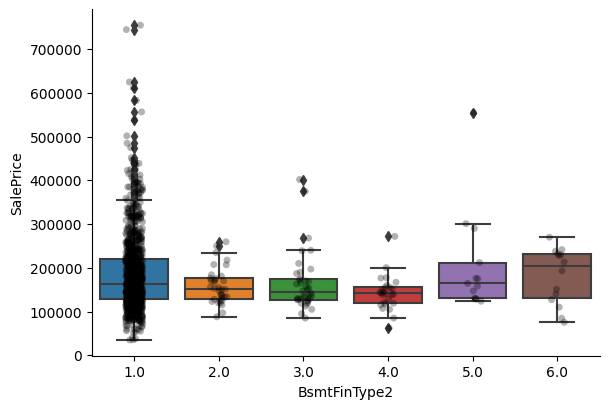

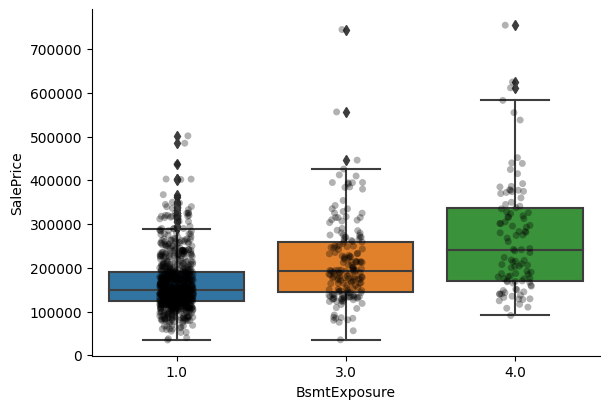

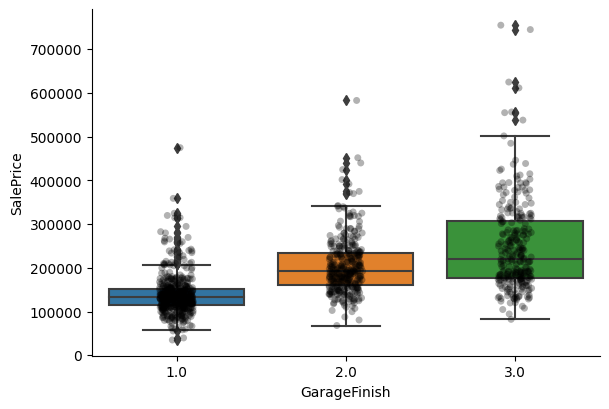

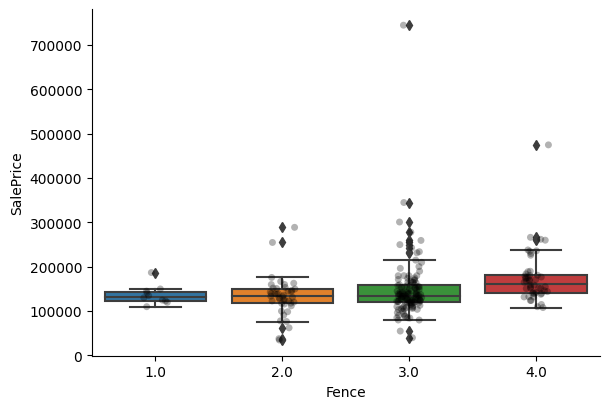

In [60]:
# now let's plot the house mean sale price based on the quality of 
# various attributes 

for var in qual_vars:
    # make boxplot with catplot 
    sns.catplot(x=var, y='SalePrice', data=df, kind='box', height=4, aspect=1.5)
    # add data points to boxplot with stripplot 
    sns.stripplot(x=var,y='SalePrice',data=df, jitter=0.1,alpha=0.3,color='k')

For most attributes, the increase in the house price with the value of the variable, is quite clear.

In [61]:
# capture the remaining categorical variables 
# (those that we did not re-map)

cat_others = [var for var in categorical_var if var not in qual_vars]

len(cat_others)

30

# 5.3 Rare labels 

Let's go ahead and investigate now if there are labels that are present only in a small number of houses:

In [62]:
def analyse_rare_labels(df,var,rare_perc):
    df = df.copy()
    
    # determine the % of observations per category 
    tmp = df.groupby(var)['SalePrice'].count()/len(df)
    
    # return categories that are rare
    return tmp[tmp<rare_perc]

# print categories that are present in less than 
# 1% of the observations 

for var in cat_others:
    print(analyse_rare_labels(df,var,0.01))
    print()

MSZoning
C (all)    0.008368
Name: SalePrice, dtype: float64

Street
Grvl    0.004184
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.005858
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Series([], Name: SalePrice, dtype: float64)

LotConfig
FR3    0.003347
Name: SalePrice, dtype: float64

LandSlope
Sev    0.004184
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001674
NPkVill    0.005858
Veenker    0.005858
Name: SalePrice, dtype: float64

Condition1
PosA    0.003347
PosN    0.007531
RRAe    0.007531
RRNe    0.000837
RRNn    0.003347
Name: SalePrice, dtype: float64

Condition2
Artery    0.001674
Feedr     0.005021
PosA      0.000837
PosN      0.001674
RRNn      0.001674
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
2.5Fin    0.006695
2.5Unf    0.008368
Name: SalePrice, dtype: float64

RoofStyle
Flat       0.005858
Gambrel    0.009205
Mansard    0.005858

Some of the categorical variables show multiple labels that are present in less than 1% of the houses. 

Labels that are under-represented in the dataset tend to cause over-fitting of machine learning models. 

That is why we want to remove them.

Finally, we want to explore the relationship between the categories of the different variables and the house sale price:

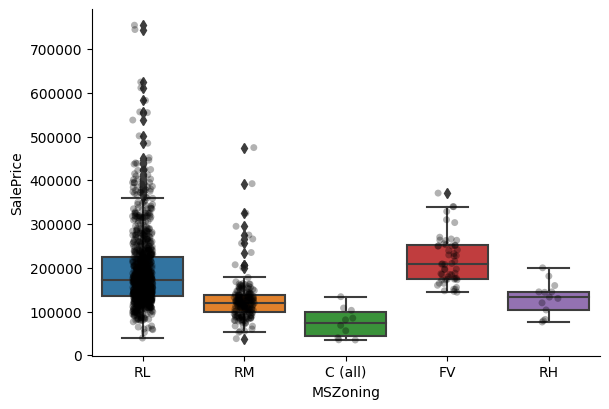

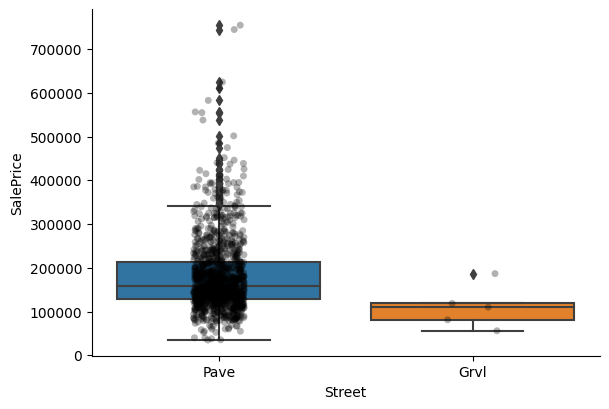

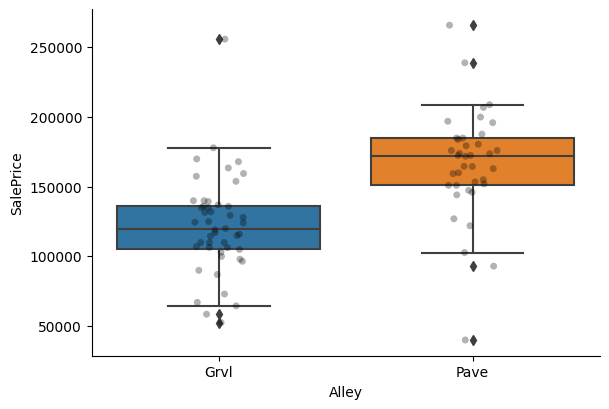

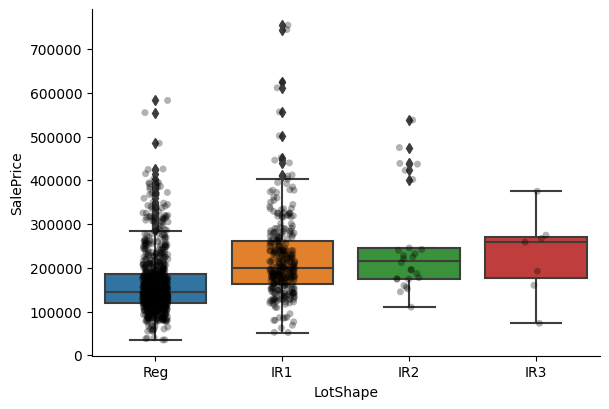

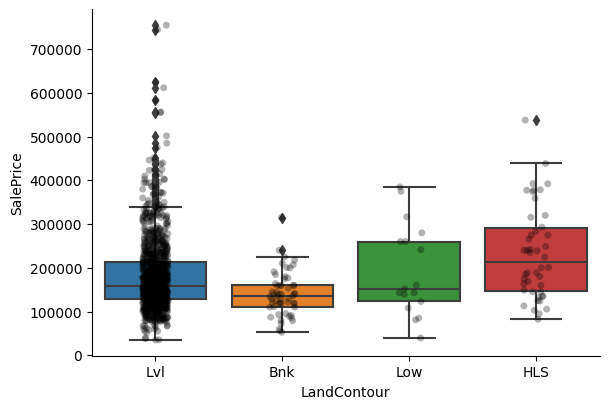

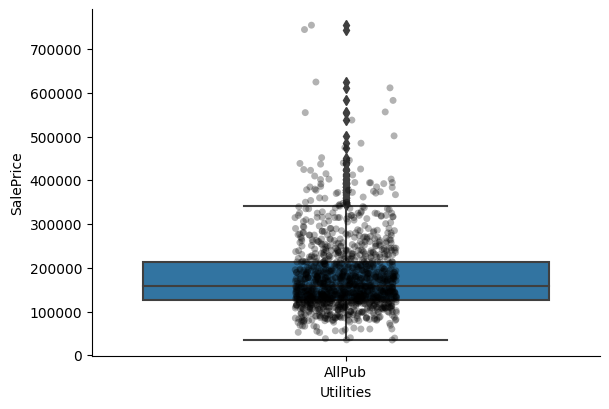

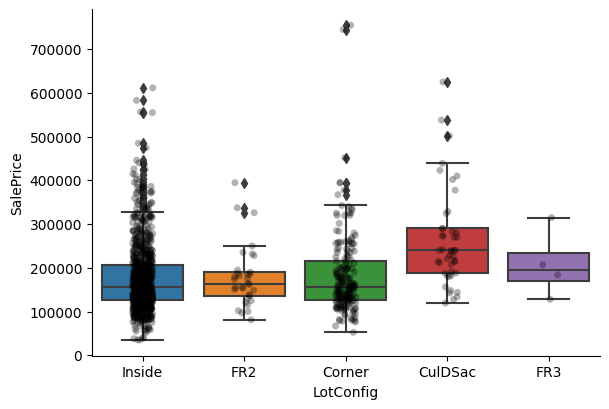

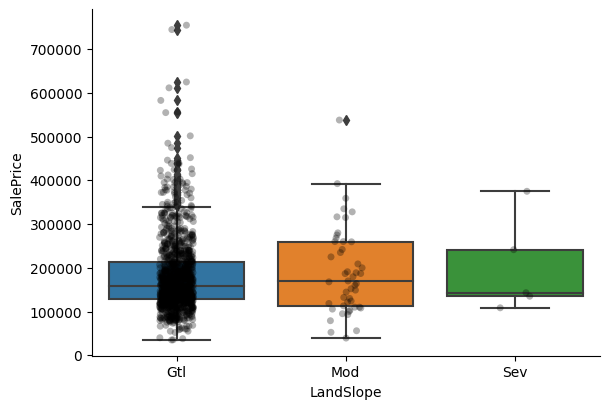

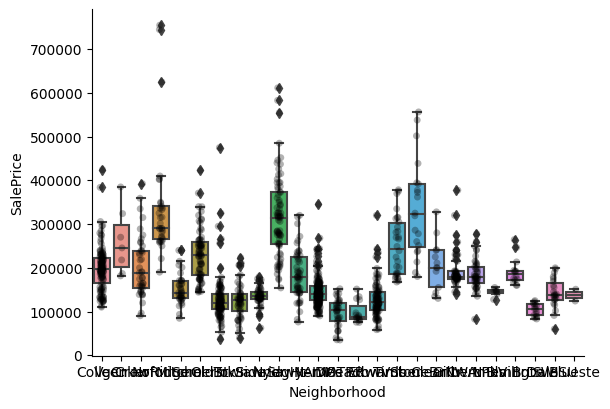

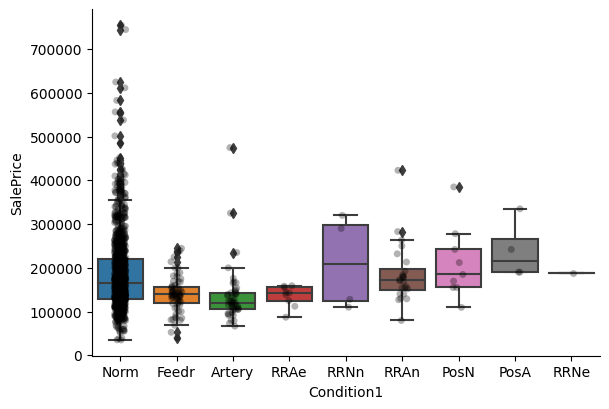

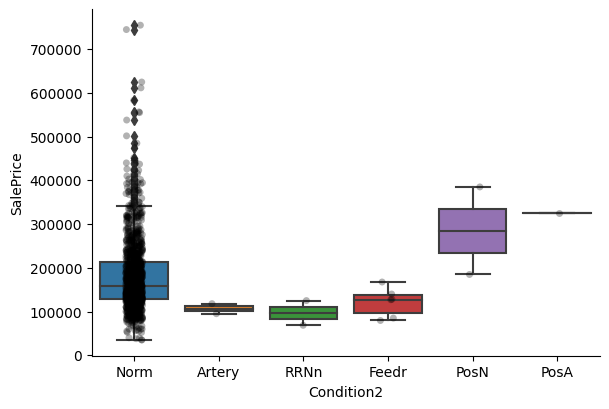

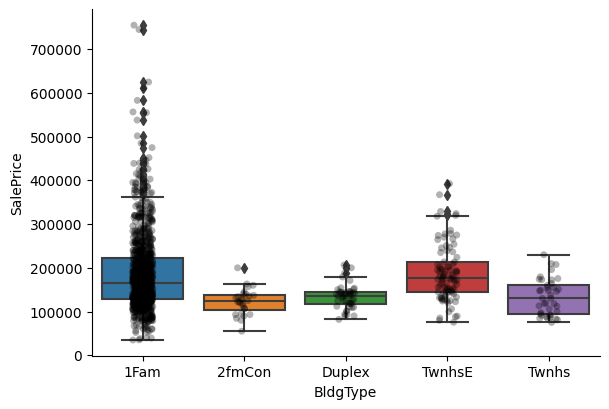

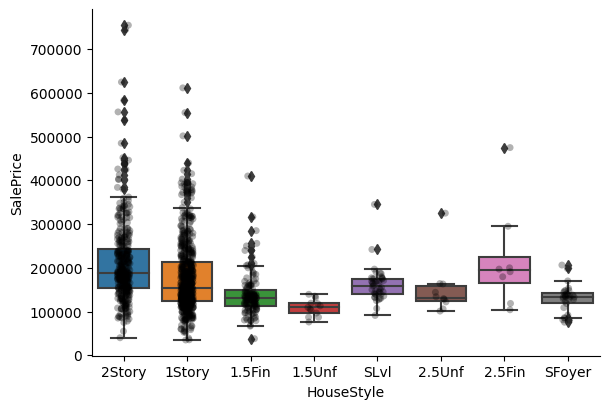

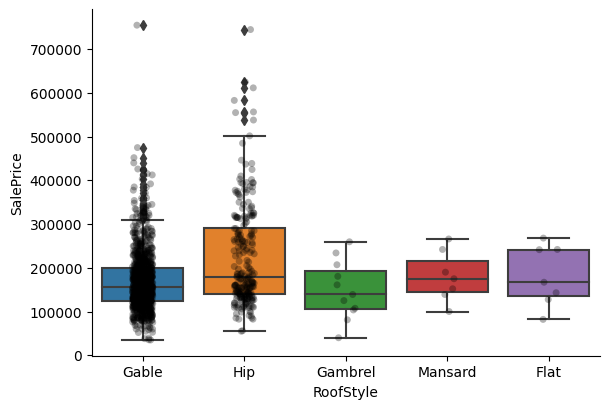

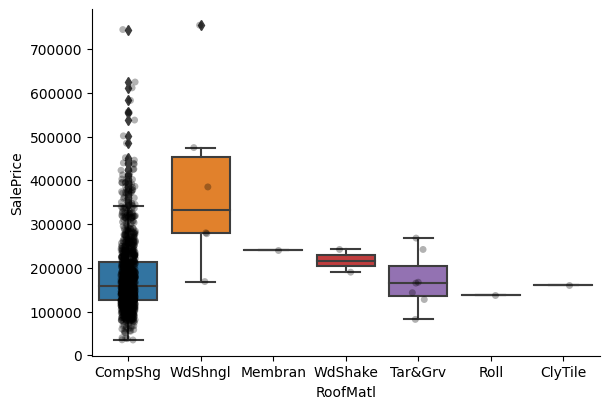

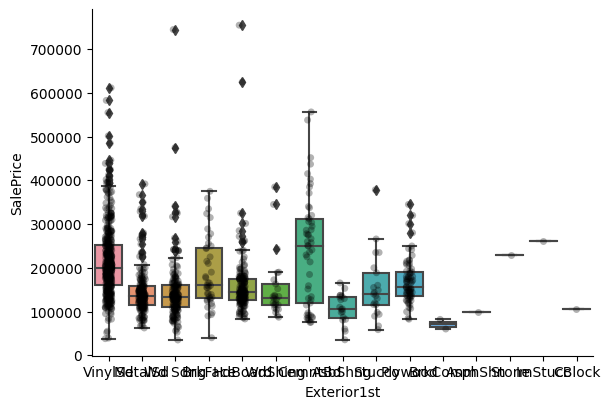

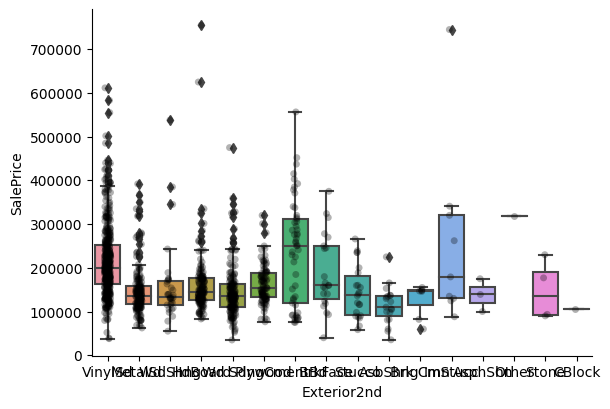

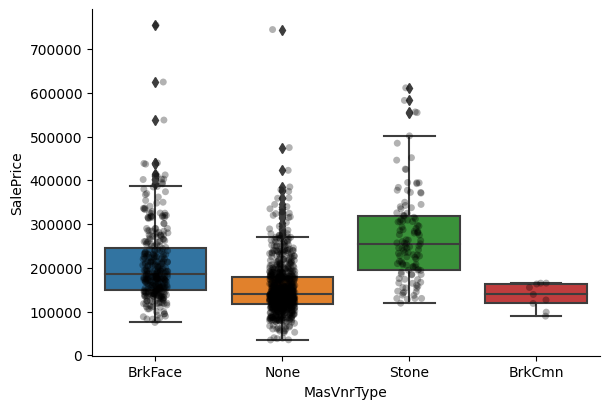

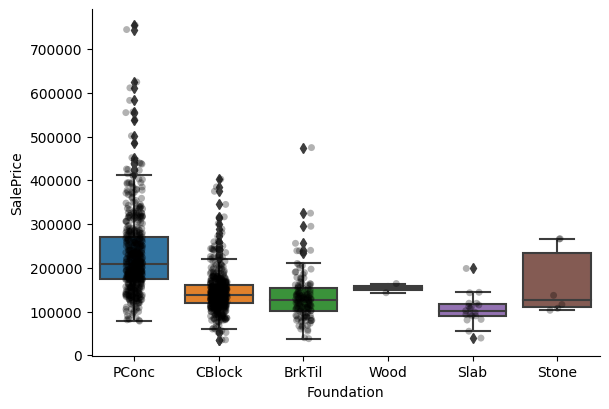

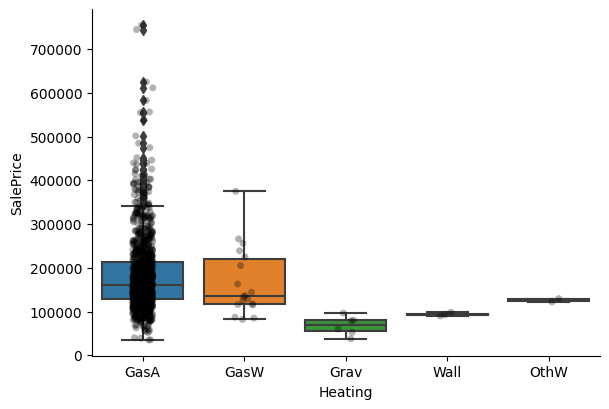

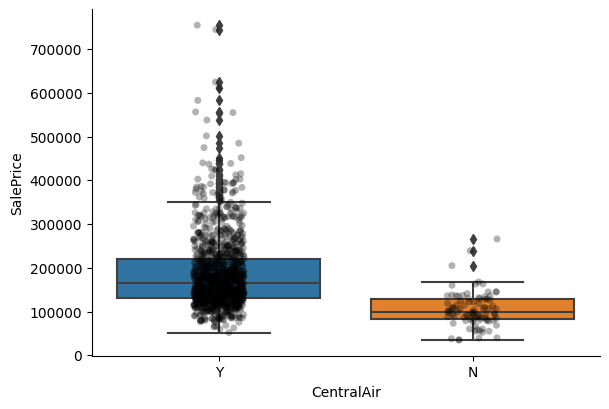

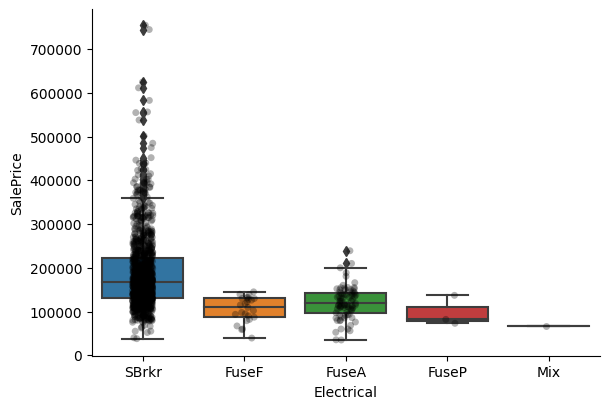

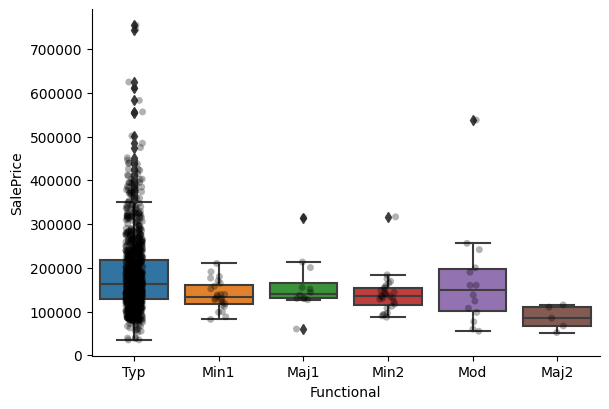

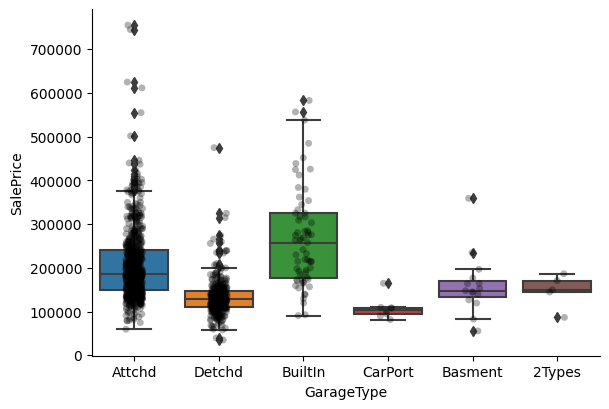

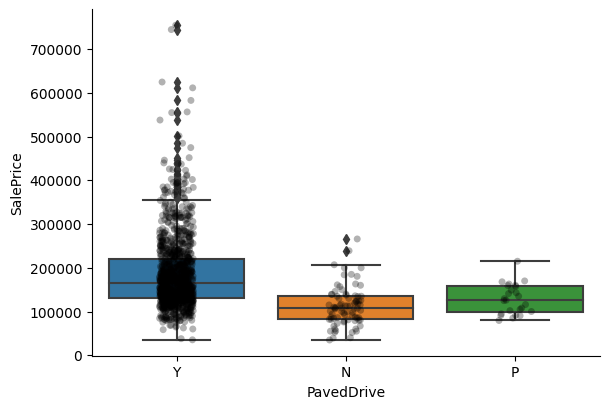

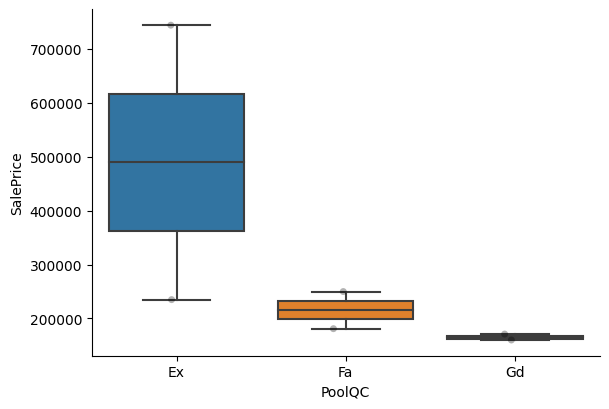

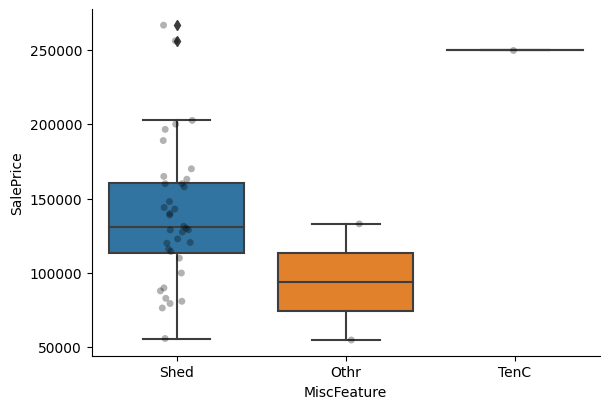

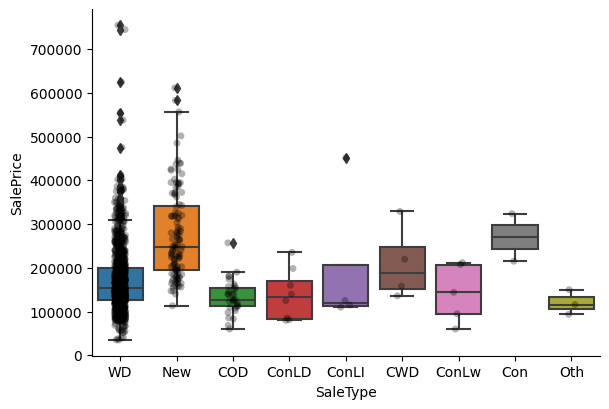

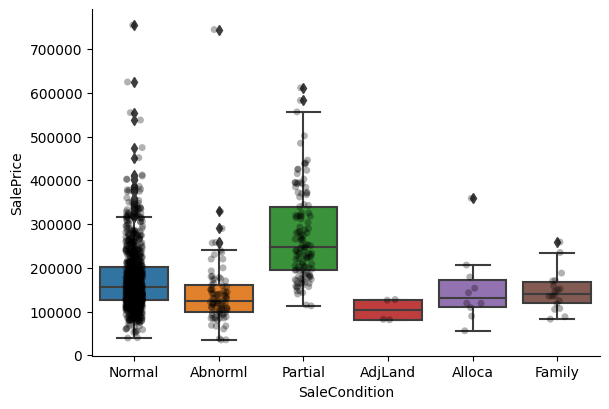

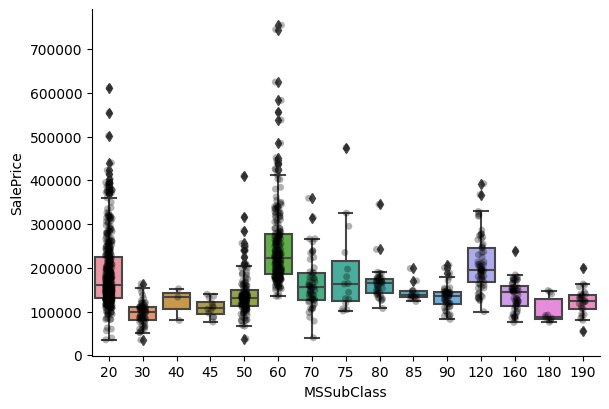

In [63]:
for var in cat_others:
    # make boxplot with Catplot 
    sns.catplot(x=var, y='SalePrice', data=df, kind='box', height=4,aspect=1.5)
    # add data points to boxplot with stripplot 
    sns.stripplot(x=var, y='SalePrice',data=df, jitter=0.1,alpha=0.3,color='k')
    plt.show()

# 4. Feature Engineering 

### Separate dataset into train and test 

It is important to separate our data into training and testing set. 

When we engineer features, some techniques learn parameters from data. It is important to learn these parameters only from the train set. This is to avoid over-fitting.

Our feature engineering techniques will learn:

- mean
- mode
- exponents for the yeo-johnson
- category frequency
- and category to number mappings

from the train set.

**Separating the data into train and test involves randomness, therefore, we need to set the seed.**

In [65]:
# Let's separate into train and test set
# Remember to set the seed (random_state for this sklearn function)

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Id','SalePrice'], axis=1), # predictive variables
    df['SalePrice'], # target
    test_size=0.1, # portion of dataset to allocate to test set
    random_state=0, # we are setting the seed here
)

X_train.shape, X_test.shape

((1314, 79), (146, 79))

## 4.1 Target 

We apply the logarithm 

In [66]:
y_train = np.log(y_train)
y_test = np.log(y_test)

## Missing values

### Categorical variables

We will replace missing values with the string "missing" in those variables with a lot of missing data. 

Alternatively, we will replace missing data with the most frequent category in those variables that contain fewer observations without values. 

This is common practice.

In [67]:
# let's identify the categorical variables
# we will capture those of type object

cat_vars = [var for var in df.columns if df[var].dtype == 'O']

# MSSubClass is also categorical by definition, despite its numeric values
# (you can find the definitions of the variables in the data_description.txt
# file available on Kaggle, in the same website where you downloaded the data)

# lets add MSSubClass to the list of categorical variables
cat_vars = cat_vars + ['MSSubClass']

# cast all variables as categorical
X_train[cat_vars] = X_train[cat_vars].astype('O')
X_test[cat_vars] = X_test[cat_vars].astype('O')

# number of categorical variables
len(cat_vars)

44

In [68]:
# make a list of the categorical variables that contain missing values

cat_vars_with_na = [
    var for var in cat_vars
    if X_train[var].isnull().sum() > 0
] 

# print percentage of missing values per variable
X_train[cat_vars_with_na ].isnull().mean().sort_values(ascending=False)

PoolQC          0.995434
MiscFeature     0.961187
Alley           0.938356
Fence           0.814307
FireplaceQu     0.472603
GarageType      0.056317
GarageFinish    0.056317
GarageQual      0.056317
GarageCond      0.056317
BsmtExposure    0.025114
BsmtFinType2    0.025114
BsmtQual        0.024353
BsmtCond        0.024353
BsmtFinType1    0.024353
MasVnrType      0.004566
Electrical      0.000761
dtype: float64

In [69]:
# variables to impute with the string missing
with_string_missing = [
    var for var in cat_vars_with_na if X_train[var].isnull().mean() > 0.1]

# variables to impute with the most frequent category
with_frequent_category = [
    var for var in cat_vars_with_na if X_train[var].isnull().mean() < 0.1]

In [70]:
with_string_missing

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [71]:
# replace missing values with new label: "Missing"

X_train[with_string_missing] = X_train[with_string_missing].fillna('Missing')
X_test[with_string_missing] = X_test[with_string_missing].fillna('Missing')

In [72]:
for var in with_frequent_category:
    
    # there can be more than 1 mode in a variable
    # we take the first one with [0]    
    mode = X_train[var].mode()[0]
    
    print(var, mode)
    
    X_train[var].fillna(mode, inplace=True)
    X_test[var].fillna(mode, inplace=True)

MasVnrType None
BsmtQual TA
BsmtCond TA
BsmtExposure No
BsmtFinType1 Unf
BsmtFinType2 Unf
Electrical SBrkr
GarageType Attchd
GarageFinish Unf
GarageQual TA
GarageCond TA


In [73]:
# check that we have no missing information in the engineered variables

X_train[cat_vars_with_na].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [74]:
# check that test set does not contain null values in the engineered variables

[var for var in cat_vars_with_na if X_test[var].isnull().sum() > 0]

[]

### Numerical variables

To engineer missing values in numerical variables, we will:

- add a binary missing indicator variable
- and then replace the missing values in the original variable with the mean

In [75]:
# now let's identify the numerical variables

num_vars = [
    var for var in X_train.columns if var not in cat_vars and var != 'SalePrice'
]

# number of numerical variables
len(num_vars)

35

In [76]:
# make a list with the numerical variables that contain missing values
vars_with_na = [
    var for var in num_vars
    if X_train[var].isnull().sum() > 0
]

# print percentage of missing values per variable
X_train[vars_with_na].isnull().mean()

LotFrontage    0.177321
MasVnrArea     0.004566
GarageYrBlt    0.056317
dtype: float64

In [77]:
# replace missing values as we described above

for var in vars_with_na:

    # calculate the mean using the train set
    mean_val = X_train[var].mean()
    
    print(var, mean_val)

    # add binary missing indicator (in train and test)
    X_train[var + '_na'] = np.where(X_train[var].isnull(), 1, 0)
    X_test[var + '_na'] = np.where(X_test[var].isnull(), 1, 0)

    # replace missing values by the mean
    # (in train and test)
    X_train[var].fillna(mean_val, inplace=True)
    X_test[var].fillna(mean_val, inplace=True)

# check that we have no more missing values in the engineered variables
X_train[vars_with_na].isnull().sum()

LotFrontage 69.87974098057354
MasVnrArea 103.7974006116208
GarageYrBlt 1978.2959677419356


LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [78]:
# check that test set does not contain null values in the engineered variables

[var for var in vars_with_na if X_test[var].isnull().sum() > 0]

[]

In [79]:
# check the binary missing indicator variables

X_train[['LotFrontage_na', 'MasVnrArea_na', 'GarageYrBlt_na']].head()

LotFrontage_na  MasVnrArea_na  GarageYrBlt_na
930                0              0               0
656                0              0               0
45                 0              0               0
1348               1              0               0
55                 0              0               0

## 4.3 Temporal variables

### 4.3.1 Capture elapsed time

We learned in the previous notebook, that there are 4 variables that refer to the years in which the house or the garage were built or remodeled. 

We will capture the time elapsed between those variables and the year in which the house was sold:

In [80]:
def elapsed_years(df,var):
    # capture difference between the year variable
    # and the year in which the house was sold 
    df[var] = df['YrSold']-df[var]
    return df 

In [81]:
for var in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    X_train = elapsed_years(X_train,var)
    X_test = elapsed_years(X_test,var)

In [82]:
# now we drop YrSold
X_train.drop(['YrSold'],axis=1,inplace=True)
X_test.drop(['YrSold'],axis=1,inplace=True)

## 4.4 Numerical variable transformation

### 4.4.1 Logarithmic transformation

In the previous notebook, we observed that the numerical variables are not normally distributed.

We will transform with the logarightm the positive numerical variables in order to get a more Gaussian-like distribution.

In [83]:
for var in ['LotFrontage','1stFlrSF','GrLivArea']:
    X_train[var] = np.log(X_train[var])
    X_test[var] = np.log(X_test[var])

In [84]:
# check that test set doent not contain null values in the engineered variables 
[var for var in ['LotFrontage','1stFlrSF','GrLivArea'] if X_test[var].isnull().sum()>0]

[]

In [85]:
# same for train set
[var for var in ["LotFrontage", "1stFlrSF", "GrLivArea"] if X_train[var].isnull().sum() > 0]

[]

###  4.4.2 Yeo-Johnson transformation 

We will apply the Yeo-Johnson transformation to LotArea 

In [86]:
# the yeo-johnson transformation learns the best exponent to transform the variable 
# it needs to learn it from the train set: 

X_train['LotArea'],param = stats.yeojohnson(X_train['LotArea'])

# and then apply the transformation to the test set with the same
# parameter: see who this time we pass param as argument to the 
# yeo-johnson 
X_test['LotArea'] = stats.yeojohnson(X_test['LotArea'],lmbda=param)

print(param) 

-12.55283001172003


C:\Users\hi\anaconda4\lib\site-packages\scipy\stats\morestats.py:1476: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))
C:\Users\hi\anaconda4\lib\site-packages\scipy\optimize\optimize.py:2555: RuntimeWarning: invalid value encountered in scalar divide
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
C:\Users\hi\anaconda4\lib\site-packages\scipy\optimize\optimize.py:2148: RuntimeWarning: invalid value encountered in scalar subtract
  tmp1 = (x - w) * (fx - fv)
C:\Users\hi\anaconda4\lib\site-packages\scipy\optimize\optimize.py:2149: RuntimeWarning: invalid value encountered in scalar subtract
  tmp2 = (x - v) * (fx - fw)


### 4.4.3 Binarize skewed variables 

There were a few variables very skewed, we would transform those into binary variables. 

In [87]:
skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

for var in skewed:
    
    # map the variable values into 0 and 1
    X_train[var] = np.where(X_train[var]==0, 0, 1)
    X_test[var] = np.where(X_test[var]==0, 0, 1)

## 4.5 Categorical variables

### 4.5.1 Apply mappings

These are variables which values have an assigned order, related to quality. For more information, check Kaggle website.

In [88]:
# re-map strings to numbers, which determine quality

qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]

for var in qual_vars:
    X_train[var] = X_train[var].map(qual_mappings)
    X_test[var] = X_test[var].map(qual_mappings)

In [89]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

var = 'BsmtExposure'

X_train[var] = X_train[var].map(exposure_mappings)
X_test[var] = X_test[var].map(exposure_mappings)

In [90]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    X_train[var] = X_train[var].map(finish_mappings)
    X_test[var] = X_test[var].map(finish_mappings)

In [91]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

X_train[var] = X_train[var].map(garage_mappings)
X_test[var] = X_test[var].map(garage_mappings)

In [92]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

X_train[var] = X_train[var].map(fence_mappings)
X_test[var] = X_test[var].map(fence_mappings)

In [93]:
# check absence of na in the train set
[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

### 4.5.2 Removing Rare Labels

For the remaining categorical variables, we will group those categories that are present in less than 1% of the observations. That is, all values of categorical variables that are shared by less than 1% of houses, well be replaced by the string "Rare".

To learn more about how to handle categorical variables visit our course [Feature Engineering for Machine Learning](https://www.trainindata.com/p/feature-engineering-for-machine-learning).

In [94]:
# capture all quality variables

qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

# capture the remaining categorical variables
# (those that we did not re-map)

cat_others = [
    var for var in cat_vars if var not in qual_vars
]

len(cat_others)

30

In [95]:
def find_frequent_labels(df, var, rare_perc):
    
    # function finds the labels that are shared by more than
    # a certain % of the houses in the dataset

    df = df.copy()

    tmp = df.groupby(var)[var].count() / len(df)

    return tmp[tmp > rare_perc].index


for var in cat_others:
    
    # find the frequent categories
    frequent_ls = find_frequent_labels(X_train, var, 0.01)
    
    print(var, frequent_ls)
    print()
    
    # replace rare categories by the string "Rare"
    X_train[var] = np.where(X_train[var].isin(
        frequent_ls), X_train[var], 'Rare')
    
    X_test[var] = np.where(X_test[var].isin(
        frequent_ls), X_test[var], 'Rare')

MSZoning Index(['FV', 'RH', 'RL', 'RM'], dtype='object', name='MSZoning')

Street Index(['Pave'], dtype='object', name='Street')

Alley Index(['Grvl', 'Missing', 'Pave'], dtype='object', name='Alley')

LotShape Index(['IR1', 'IR2', 'Reg'], dtype='object', name='LotShape')

LandContour Index(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='object', name='LandContour')

Utilities Index(['AllPub'], dtype='object', name='Utilities')

LotConfig Index(['Corner', 'CulDSac', 'FR2', 'Inside'], dtype='object', name='LotConfig')

LandSlope Index(['Gtl', 'Mod'], dtype='object', name='LandSlope')

Neighborhood Index(['Blmngtn', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor',
       'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NWAmes',
       'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW',
       'Somerst', 'StoneBr', 'Timber'],
      dtype='object', name='Neighborhood')

Condition1 Index(['Artery', 'Feedr', 'Norm', 'PosN', 'RRAn'], dtype='object', name='Condition1')

Con

### 4.5.3 Encoding of categorical variables

Next, we need to transform the strings of the categorical variables into numbers. 

We will do it so that we capture the monotonic relationship between the label and the target.

To learn more about how to encode categorical variables visit our course [Feature Engineering for Machine Learning](https://www.trainindata.com/p/feature-engineering-for-machine-learning).

In [96]:
# this function will assign discrete values to the strings of the variables,
# so that the smaller value corresponds to the category that shows the smaller
# mean house sale price

def replace_categories(train, test, y_train, var, target):
    
    tmp = pd.concat([X_train, y_train], axis=1)
    
    # order the categories in a variable from that with the lowest
    # house sale price, to that with the highest
    ordered_labels = tmp.groupby([var])[target].mean().sort_values().index

    # create a dictionary of ordered categories to integer values
    ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}
    
    print(var, ordinal_label)
    print()

    # use the dictionary to replace the categorical strings by integers
    train[var] = train[var].map(ordinal_label)
    test[var] = test[var].map(ordinal_label)

In [97]:
for var in cat_others:
    replace_categories(X_train, X_test, y_train, var, 'SalePrice')

MSZoning {'Rare': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}

Street {'Rare': 0, 'Pave': 1}

Alley {'Grvl': 0, 'Pave': 1, 'Missing': 2}

LotShape {'Reg': 0, 'IR1': 1, 'Rare': 2, 'IR2': 3}

LandContour {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3}

Utilities {'Rare': 0, 'AllPub': 1}

LotConfig {'Inside': 0, 'FR2': 1, 'Corner': 2, 'Rare': 3, 'CulDSac': 4}

LandSlope {'Gtl': 0, 'Mod': 1, 'Rare': 2}

Neighborhood {'IDOTRR': 0, 'MeadowV': 1, 'BrDale': 2, 'Edwards': 3, 'BrkSide': 4, 'OldTown': 5, 'Sawyer': 6, 'SWISU': 7, 'NAmes': 8, 'Mitchel': 9, 'SawyerW': 10, 'Rare': 11, 'NWAmes': 12, 'Gilbert': 13, 'Blmngtn': 14, 'CollgCr': 15, 'Crawfor': 16, 'ClearCr': 17, 'Somerst': 18, 'Timber': 19, 'StoneBr': 20, 'NridgHt': 21, 'NoRidge': 22}

Condition1 {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'RRAn': 3, 'Rare': 4, 'PosN': 5}

Condition2 {'Rare': 0, 'Norm': 1}

BldgType {'2fmCon': 0, 'Duplex': 1, 'Twnhs': 2, '1Fam': 3, 'TwnhsE': 4}

HouseStyle {'SFoyer': 0, '1.5Fin': 1, 'Rare': 2, '1Story': 3, 'SLvl': 4, '2Story'

In [98]:
# check absence of na in the train set
[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

In [99]:
# check absence of na in the test set
[var for var in X_test.columns if X_test[var].isnull().sum() > 0]

[]

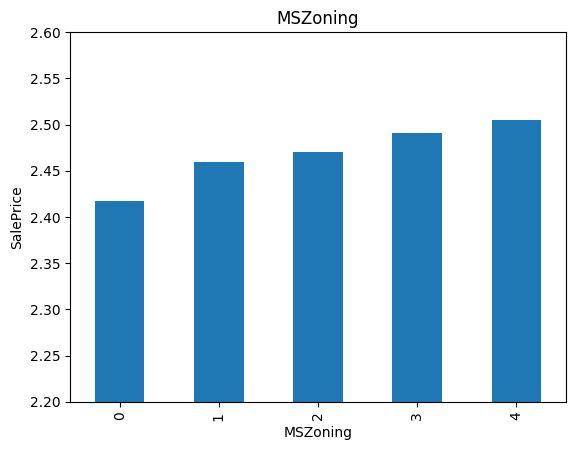

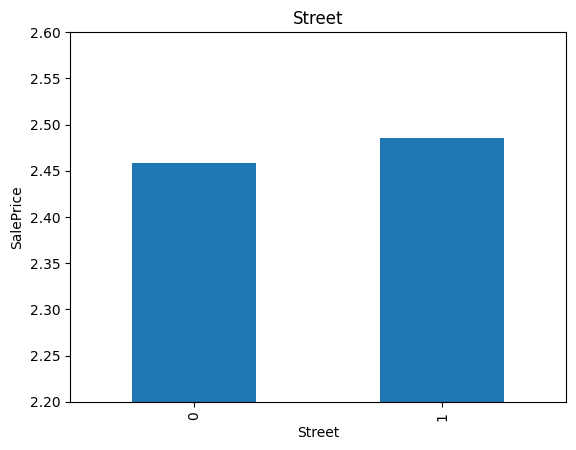

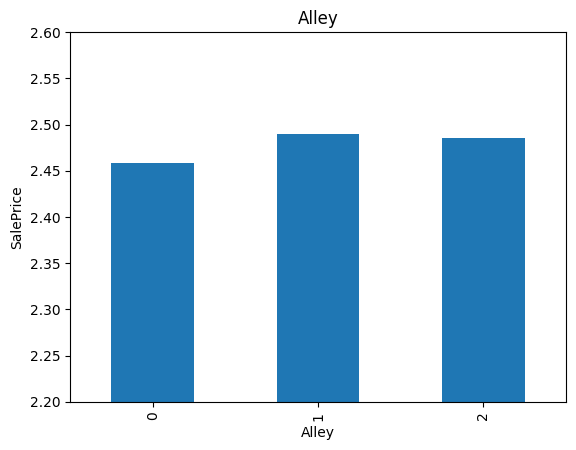

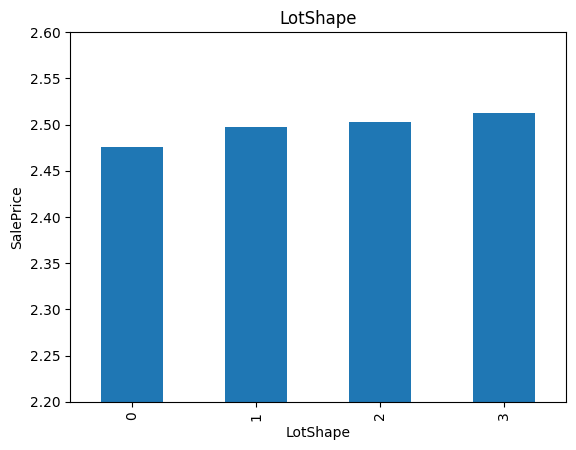

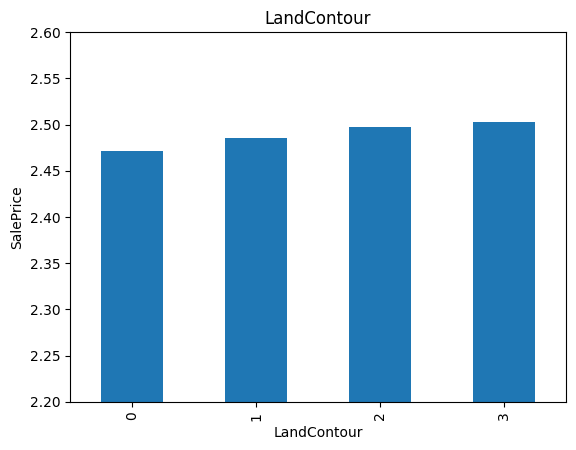

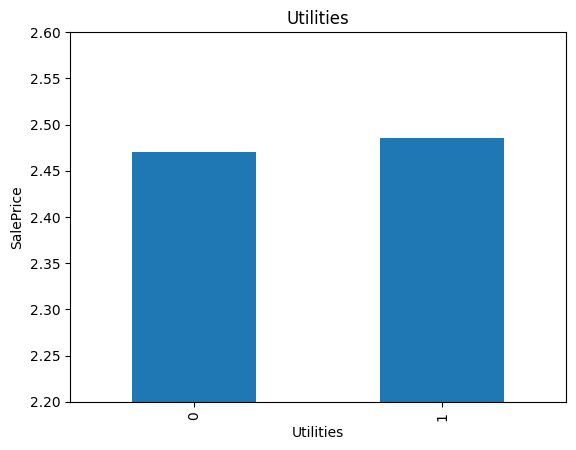

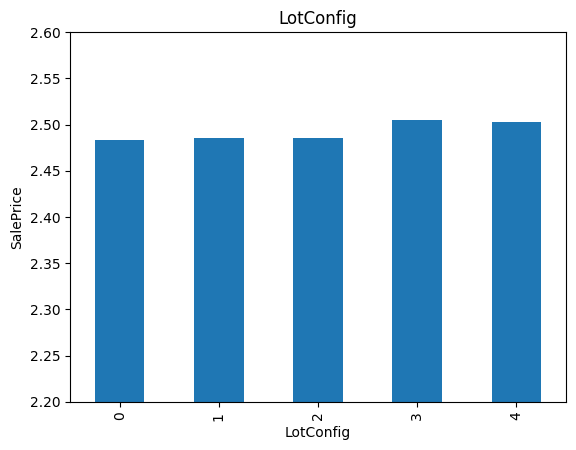

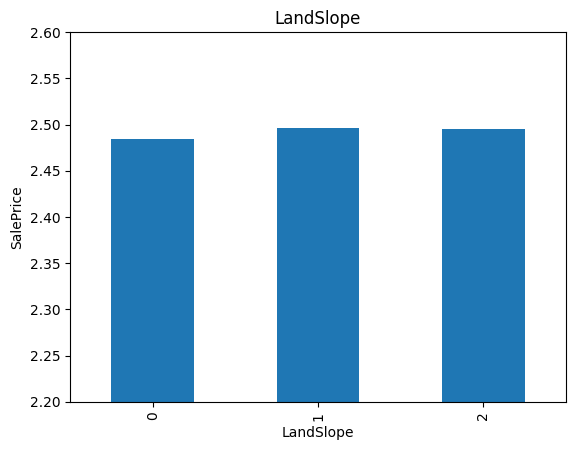

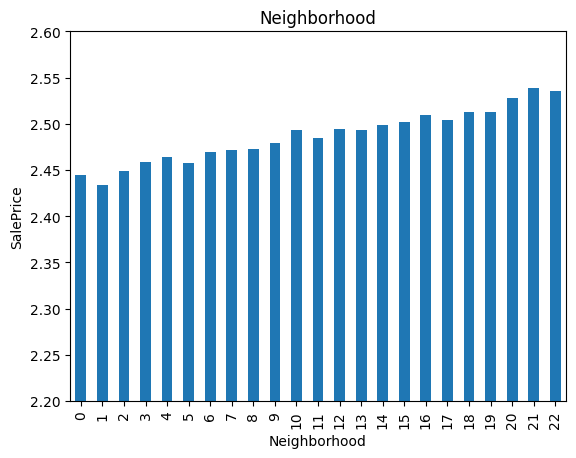

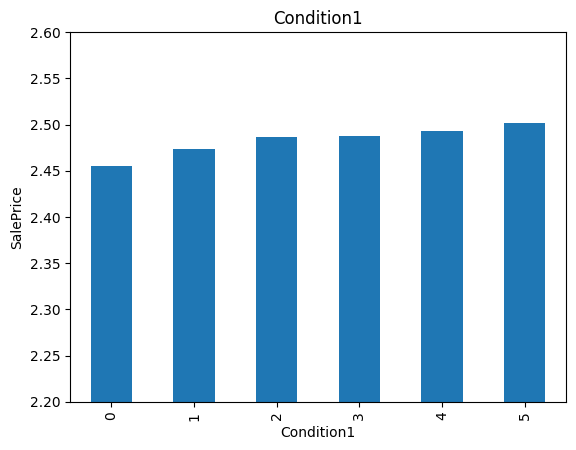

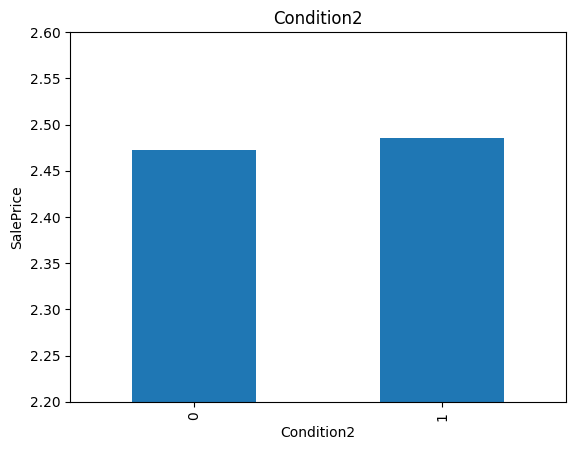

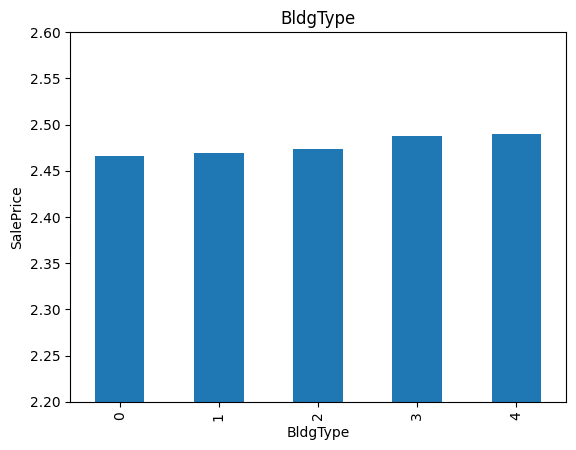

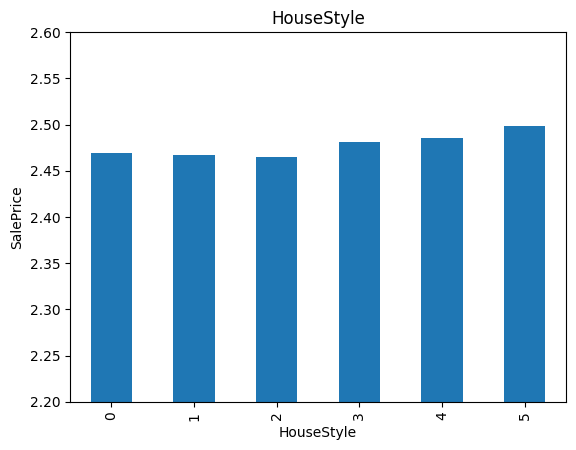

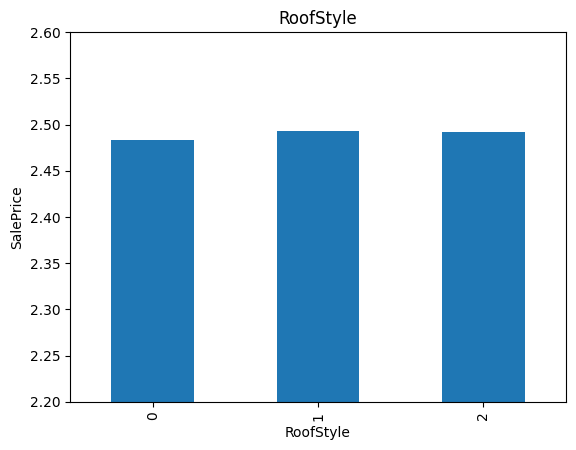

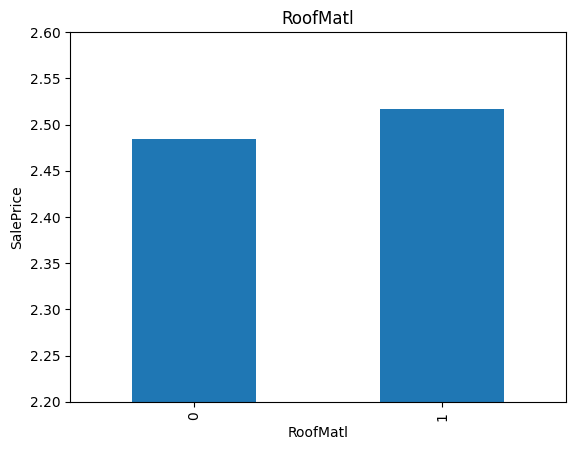

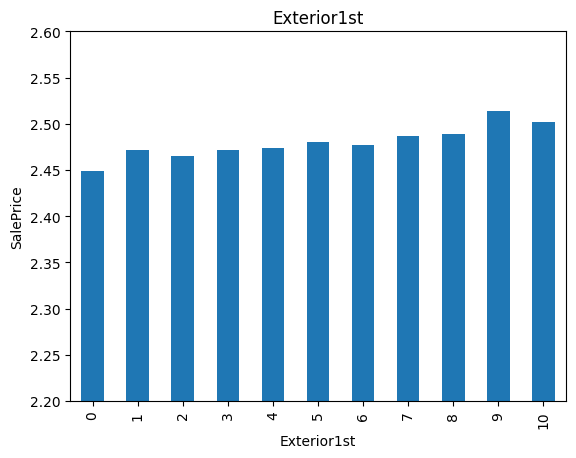

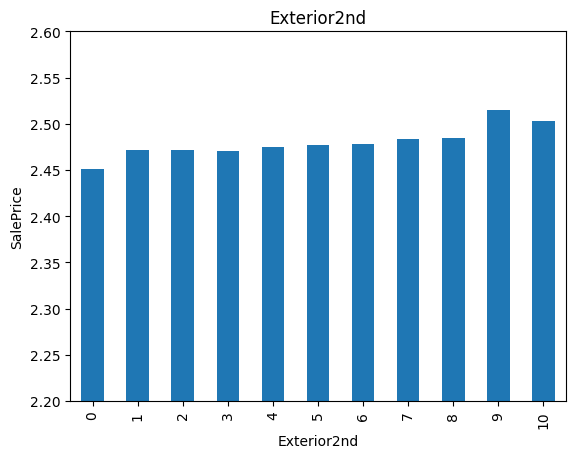

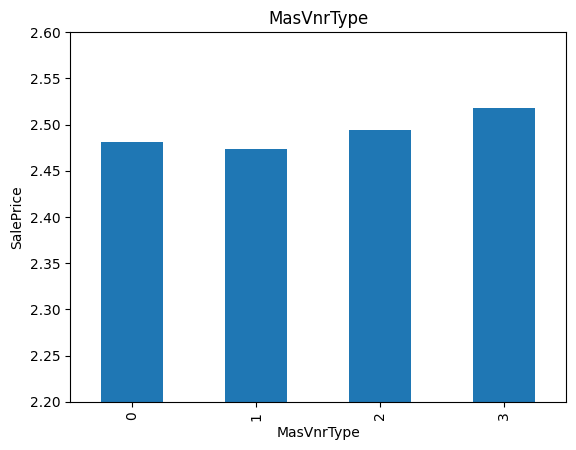

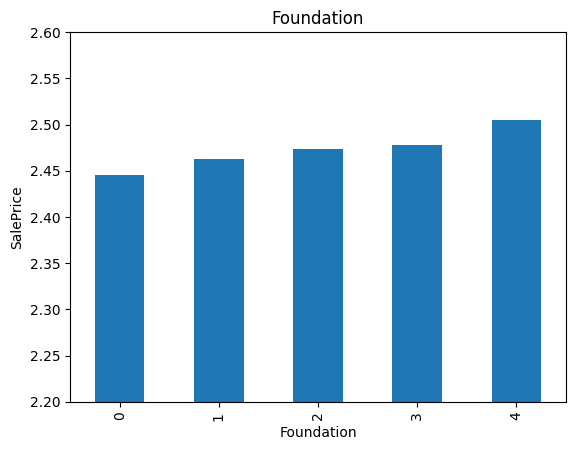

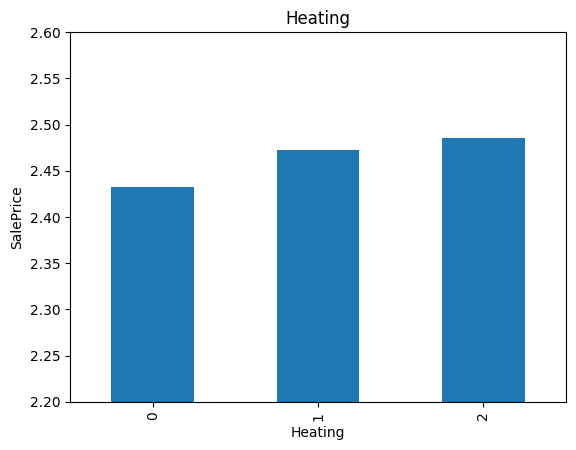

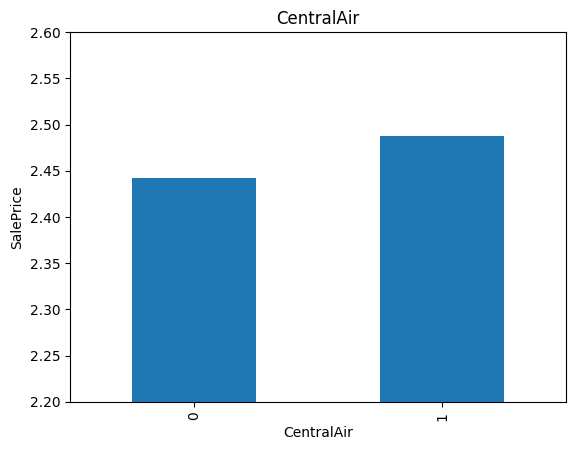

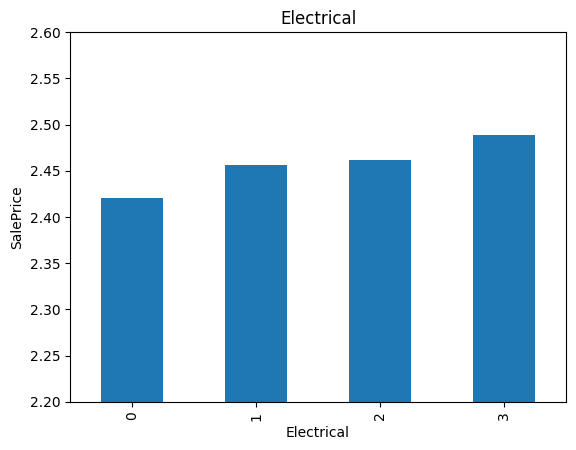

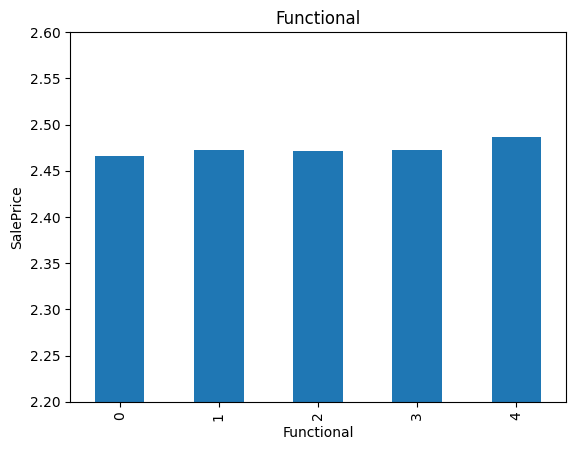

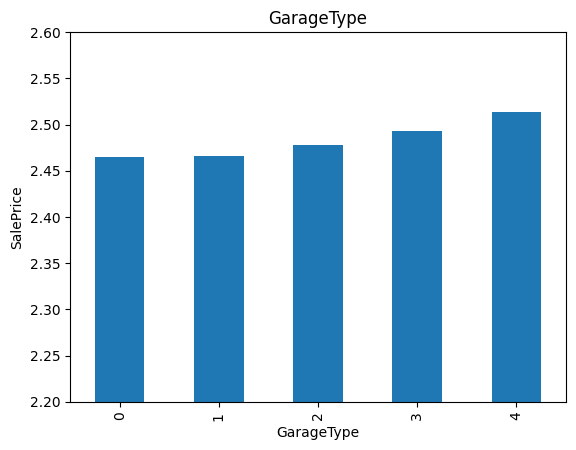

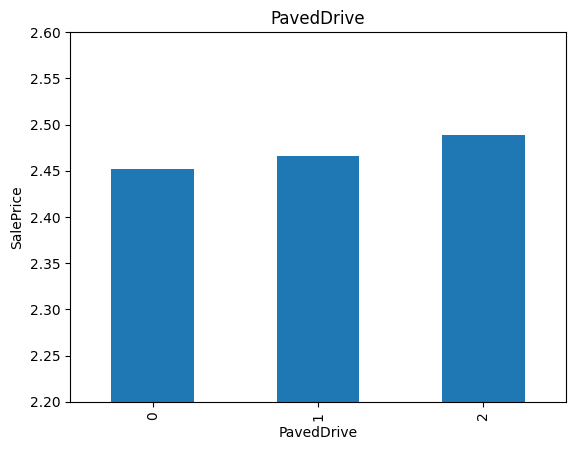

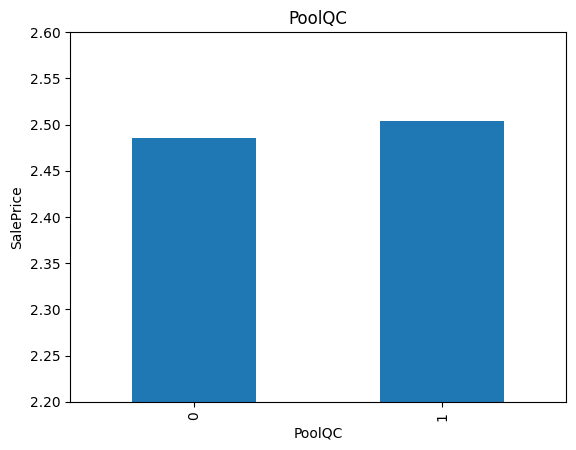

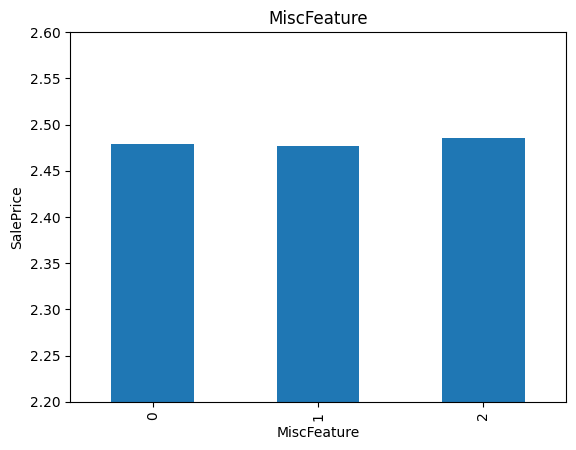

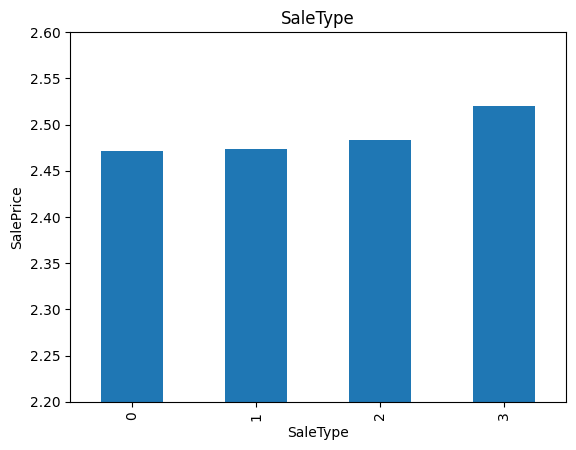

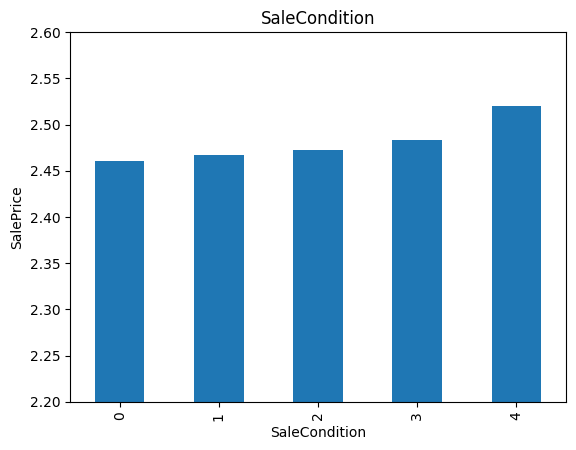

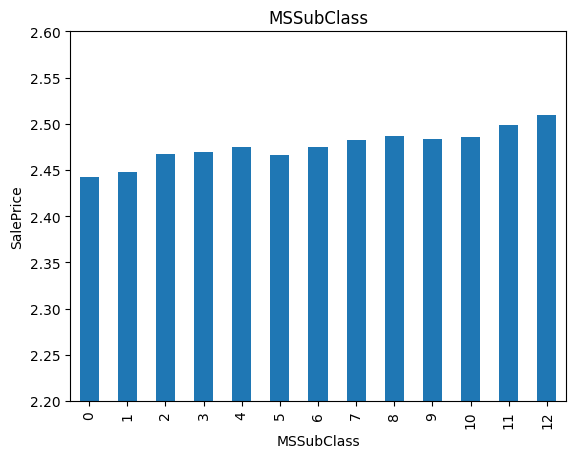

In [100]:
# let me show you what I mean by monotonic relationship
# between labels and target

def analyse_vars(train, y_train, var):
    
    # function plots median house sale price per encoded
    # category
    
    tmp = pd.concat([X_train, np.log(y_train)], axis=1)
    
    tmp.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylim(2.2, 2.6)
    plt.ylabel('SalePrice')
    plt.show()
    
for var in cat_others:
    analyse_vars(X_train, y_train, var)

The monotonic relationship is particularly clear for the variables MSZoning and Neighborhood. Note how, the higher the integer that now represents the category, the higher the mean house sale price.

(remember that the target is log-transformed, that is why the differences seem so small).

## 4.6 Feature Scaling

For use in linear models, features need to be either scaled. We will scale features to the minimum and maximum values:

In [101]:
# create scaler
scaler = MinMaxScaler()

#  fit  the scaler to the train set
scaler.fit(X_train) 

# transform the train and test set

# sklearn returns numpy arrays, so we wrap the
# array with a pandas dataframe

X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_train.columns
)

In [102]:
X_train.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0    0.750000      0.75     0.461171      0.0     1.0    1.0  0.333333   
1    0.750000      0.75     0.456066      0.0     1.0    1.0  0.333333   
2    0.916667      0.75     0.394699      0.0     1.0    1.0  0.000000   
3    0.750000      0.75     0.445002      0.0     1.0    1.0  0.666667   
4    0.750000      0.75     0.577658      0.0     1.0    1.0  0.333333   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0     1.000000        1.0        0.0        0.0      0.863636         0.4   
1     0.333333        1.0        0.0        0.0      0.363636         0.4   
2     0.333333        1.0        0.0        0.0      0.954545         0.4   
3     0.666667        1.0        0.0        0.0      0.454545         0.4   
4     0.333333        1.0        0.0        0.0      0.363636         0.4   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0         1.0      0.75         0.6     0.777778         0.50   0.014706   
1         1.0      0.75         0.6     0.444444         0.75   0.360294   
2         1.0      1.00         0.6     0.888889         0.50   0.036765   
3         1.0      0.75         0.6     0.666667         0.50   0.066176   
4         1.0      0.75         0.6     0.555556         0.50   0.323529   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0      0.049180        0.0       0.0          1.0          1.0    0.333333   
1      0.049180        0.0       0.0          0.6          0.6    0.666667   
2      0.098361        1.0       0.0          0.3          0.2    0.666667   
3      0.163934        0.0       0.0          1.0          1.0    0.333333   
4      0.737705        0.0       0.0          0.6          0.7    0.666667   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0     0.00000   0.666667        0.5         1.0  0.666667  0.666667   
1     0.03375   0.666667        0.5         0.5  0.333333  0.666667   
2     0.25750   1.000000        0.5         1.0  1.000000  0.666667   
3     0.00000   0.666667        0.5         1.0  0.666667  0.666667   
4     0.17000   0.333333        0.5         0.5  0.333333  0.666667   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0      0.666667           1.0    0.002835           0.0         0.0   
1      0.000000           0.8    0.142807           0.0         0.0   
2      0.000000           1.0    0.080794           0.0         0.0   
3      1.000000           1.0    0.255670           0.0         0.0   
4      0.000000           0.6    0.086818           0.0         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.673479     0.239935      1.0       1.00         1.0         1.0   
1   0.114724     0.172340      1.0       1.00         1.0         1.0   
2   0.601951     0.286743      1.0       1.00         1.0         1.0   
3   0.018114     0.242553      1.0       1.00         1.0         1.0   
4   0.434278     0.233224      1.0       0.75         1.0         1.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.559760       0.0           0.0   0.523250      0.000000           0.0   
1  0.434539       0.0           0.0   0.406196      0.333333           0.0   
2  0.627205       0.0           0.0   0.586296      0.333333           0.0   
3  0.566920       0.0           0.0   0.529943      0.333333           0.0   
4  0.549026       0.0           0.0   0.513216      0.000000           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.666667       0.0         0.375      0.333333     0.666667      0.416667   
1  0.333333       0.5         0.375      0.333333     0.666667      0.250000   
2  0.666667       0.0         0.250      0.333333     1.000000      0.333333   
3  0.666667       0.0         0.375      0.333333     0.666667      0.250000   
4  0.66

In [103]:
# let's now save the train and test sets for the next notebook!

X_train.to_csv('xtrain.csv', index=False)
X_test.to_csv('xtest.csv', index=False)

y_train.to_csv('ytrain.csv', index=False)
y_test.to_csv('ytest.csv', index=False) 

In [104]:
# now let's save the scaler

joblib.dump(scaler, 'minmax_scaler.joblib') 

['minmax_scaler.joblib']

# 1.1.1 Feature Selection 

In [105]:
# load the train and test set with the engineered variables

# we built and saved these datasets in the previous lecture.
# If you haven't done so, go ahead and check the previous notebook
# to find out how to create these datasets

X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

X_train.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0    0.750000      0.75     0.461171      0.0     1.0    1.0  0.333333   
1    0.750000      0.75     0.456066      0.0     1.0    1.0  0.333333   
2    0.916667      0.75     0.394699      0.0     1.0    1.0  0.000000   
3    0.750000      0.75     0.445002      0.0     1.0    1.0  0.666667   
4    0.750000      0.75     0.577658      0.0     1.0    1.0  0.333333   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0     1.000000        1.0        0.0        0.0      0.863636         0.4   
1     0.333333        1.0        0.0        0.0      0.363636         0.4   
2     0.333333        1.0        0.0        0.0      0.954545         0.4   
3     0.666667        1.0        0.0        0.0      0.454545         0.4   
4     0.333333        1.0        0.0        0.0      0.363636         0.4   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0         1.0      0.75         0.6     0.777778         0.50   0.014706   
1         1.0      0.75         0.6     0.444444         0.75   0.360294   
2         1.0      1.00         0.6     0.888889         0.50   0.036765   
3         1.0      0.75         0.6     0.666667         0.50   0.066176   
4         1.0      0.75         0.6     0.555556         0.50   0.323529   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0      0.049180        0.0       0.0          1.0          1.0    0.333333   
1      0.049180        0.0       0.0          0.6          0.6    0.666667   
2      0.098361        1.0       0.0          0.3          0.2    0.666667   
3      0.163934        0.0       0.0          1.0          1.0    0.333333   
4      0.737705        0.0       0.0          0.6          0.7    0.666667   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0     0.00000   0.666667        0.5         1.0  0.666667  0.666667   
1     0.03375   0.666667        0.5         0.5  0.333333  0.666667   
2     0.25750   1.000000        0.5         1.0  1.000000  0.666667   
3     0.00000   0.666667        0.5         1.0  0.666667  0.666667   
4     0.17000   0.333333        0.5         0.5  0.333333  0.666667   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0      0.666667           1.0    0.002835           0.0         0.0   
1      0.000000           0.8    0.142807           0.0         0.0   
2      0.000000           1.0    0.080794           0.0         0.0   
3      1.000000           1.0    0.255670           0.0         0.0   
4      0.000000           0.6    0.086818           0.0         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.673479     0.239935      1.0       1.00         1.0         1.0   
1   0.114724     0.172340      1.0       1.00         1.0         1.0   
2   0.601951     0.286743      1.0       1.00         1.0         1.0   
3   0.018114     0.242553      1.0       1.00         1.0         1.0   
4   0.434278     0.233224      1.0       0.75         1.0         1.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.559760       0.0           0.0   0.523250      0.000000           0.0   
1  0.434539       0.0           0.0   0.406196      0.333333           0.0   
2  0.627205       0.0           0.0   0.586296      0.333333           0.0   
3  0.566920       0.0           0.0   0.529943      0.333333           0.0   
4  0.549026       0.0           0.0   0.513216      0.000000           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.666667       0.0         0.375      0.333333     0.666667      0.416667   
1  0.333333       0.5         0.375      0.333333     0.666667      0.250000   
2  0.666667       0.0         0.250      0.333333     1.000000      0.333333   
3  0.666667       0.0         0.375      0.333333     0.666667      0.250000   
4  0.66

In [106]:
# load the target (remember that the target is log transformed)
y_train = pd.read_csv('ytrain.csv')
y_test = pd.read_csv('ytest.csv')

y_train.head()

SalePrice
0  12.211060
1  11.887931
2  12.675764
3  12.278393
4  12.103486

In [107]:
# We will do the model fitting and feature selection
# altogether in a few lines of code

# first, we specify the Lasso Regression model, and we
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then we use the selectFromModel object from sklearn, which
# will select automatically the features which coefficients are non-zero

# remember to set the seed, the random state in this function
sel_ = SelectFromModel(Lasso(alpha=0.001, random_state=0))

# train Lasso model and select features
sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [108]:
sel_.get_support().sum()

36

In [109]:
# let's visualise those features that were selected.
# (selected features marked with True)

sel_.get_support()

array([ True,  True,  True, False, False, False,  True,  True, False,
        True, False,  True, False, False, False, False,  True,  True,
       False,  True,  True, False,  True, False, False, False,  True,
       False,  True,  True, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False,  True,  True, False,
        True,  True, False, False,  True, False, False,  True,  True,
        True,  True,  True, False, False,  True,  True,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False])

In [110]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feats = X_train.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 81
selected features: 36
features with coefficients shrank to zero: 45


In [111]:
# print the selected features
selected_feats

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'HalfBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'ScreenPorch', 'SaleCondition'],
      dtype='object')

In [112]:
# print the selected features
selected_feats

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'HalfBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'ScreenPorch', 'SaleCondition'],
      dtype='object')

In [113]:
pd.Series(selected_feats).to_csv('selected_features.csv', index=False)

# Model Training

In [114]:
# load the pre-selected features
# ==============================

# we selected the features in the previous notebook (step 3)

# if you haven't done so, go ahead and visit the previous notebook
# to find out how to select the features

features = pd.read_csv('selected_features.csv')
features = features['0'].to_list() 

# display final feature set
features

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'HalfBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'ScreenPorch',
 'SaleCondition']

In [115]:
# reduce the train and test set to the selected features

X_train = X_train[features]
X_test = X_test[features]

### Regularised linear regression: Lasso

Remember to set the seed.

In [116]:
# set up the model
# remember to set the random_state / seed

lin_model = Lasso(alpha=0.001, random_state=0)

# train the model

lin_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=0)

In [119]:
# evaluate the model:
# ====================

# remember that we log transformed the output (SalePrice)
# in our feature engineering notebook (step 2).

# In order to get the true performance of the Lasso
# we need to transform both the target and the predictions
# back to the original house prices values.

# We will evaluate performance using the mean squared error and
# the root of the mean squared error and r2

# make predictions for train set
pred = lin_model.predict(X_train)

# determine mse, rmse and r2
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred), squared=False))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = lin_model.predict(X_test)

# determine mse, rmse and r2
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price: ', int(np.exp(y_train).median()))

train mse: 781396538
train rmse: 27953
train r2: 0.8748530463468015

test mse: 1060767982
test rmse: 32569
test r2: 0.8456417073258413



C:\Users\hi\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\hi\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Average house price:  163000


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

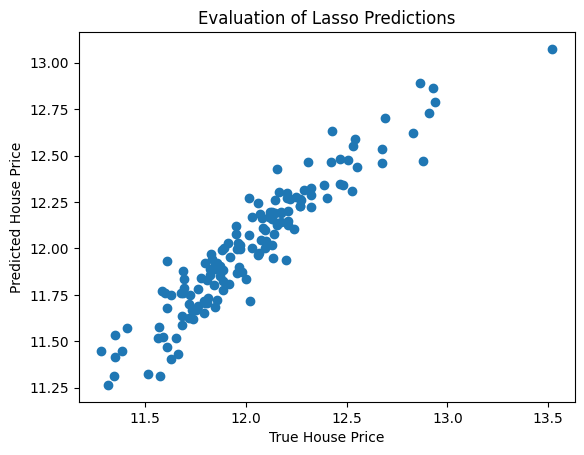

In [120]:
# let's evaluate our predictions respect to the real sale price
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

We can see that our model is doing a pretty good job at estimating house prices.

In [121]:
y_test.reset_index(drop=True)

SalePrice
0    12.209188
1    11.798104
2    11.608236
3    12.165251
4    11.385092
..         ...
141  11.884489
142  12.287653
143  11.921718
144  11.598727
145  12.017331

[146 rows x 1 columns]

In [122]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

y_test.reset_index(drop=True, inplace=True)

preds = pd.Series(lin_model.predict(X_test))

preds

0      12.148226
1      11.919326
2      11.677107
3      12.304289
4      11.447473
         ...    
141    11.775100
142    12.316546
143    11.955957
144    11.757571
145    12.072691
Length: 146, dtype: float64

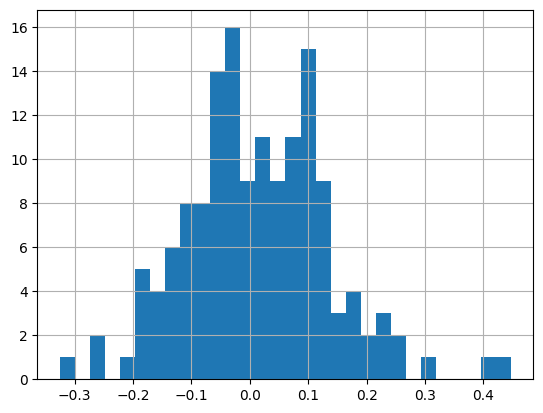

In [123]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

errors = y_test['SalePrice'] - preds
errors.hist(bins=30)
plt.show()

The distribution of the errors follows quite closely a gaussian distribution. That suggests that our model is doing a good job as well.

### Feature importance

Text(0.5, 1.0, 'Feature Importance')

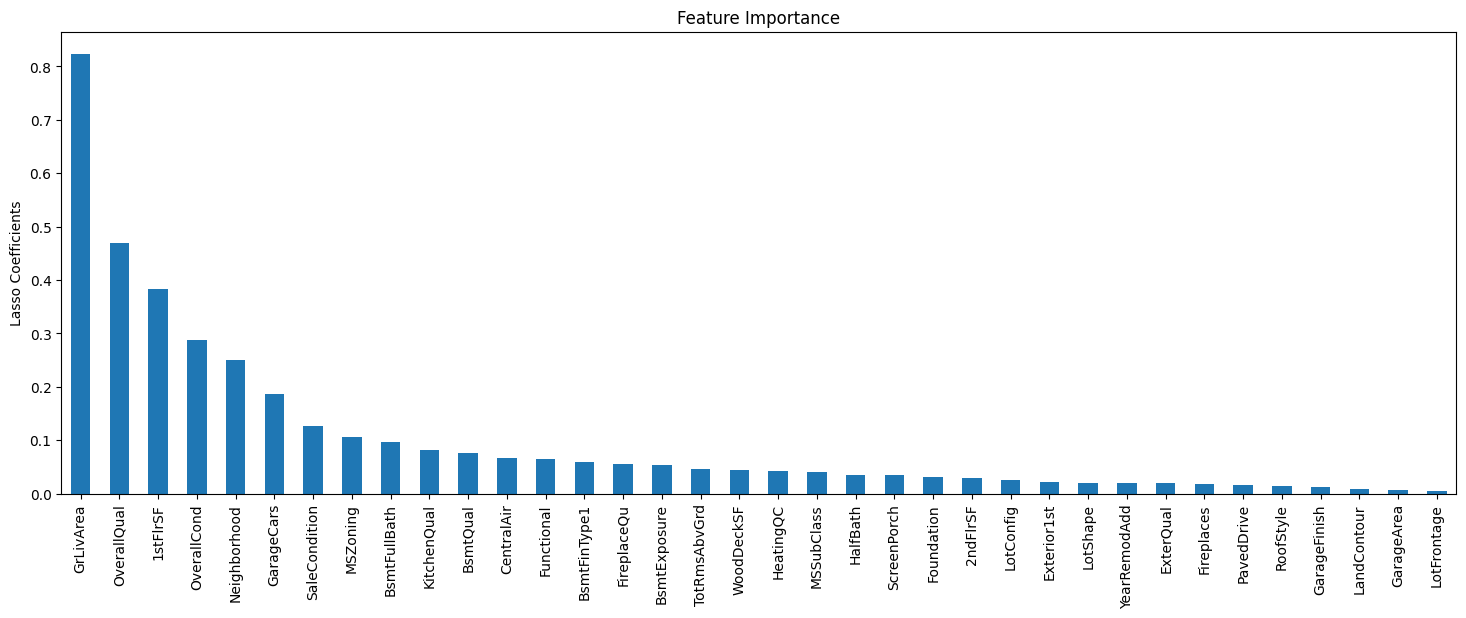

In [124]:
# Finally, just for fun, let's look at the feature importance

importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')

## Save the Model

In [125]:
# we are happy to our model, so we save it to be able
# to score new data

joblib.dump(lin_model, 'linear_regression.joblib') 

['linear_regression.joblib']